# Baseball Case Study

### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

#### -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#### -- Output: Number of predicted wins (W)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/baseball.csv")  # importing dataset

# Data Analysis

In [4]:
df.head(5)  # checking first 5 elements of the dataset

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [5]:
df.tail(5)  # checking last 5 elements of the dataset

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

In [6]:
df.sample(5) # checking random 5 elements of the dataset

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
19  64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
9   78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
7   81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
12  85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   

    SHO  SV   E  
19    8  35  90  
27   12  44  86  
9    10  40  97  
7    10  43  77  
12   12  46  93

In [7]:
print(df.shape)  # checking shape of the dataset
# (30, 17)

(30, 17)


In [8]:
# observations of full dataset

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Checking overall dataset for better understandings

In [9]:
df  # checking full dataset

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [10]:
df.columns  # checking columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### About the columns

W stands for Wins

R stands for Runs

AB stands for At Bats

H stands for Hits

2B stands for Doubles

3B stands for Triples

HR stands for Homeruns

BB stands for Base on Balls i.e Walks

SO stands for Strikeouts

SB stands for Stolen Bases

RA stands for Runs Allowed

ER stands for Earned Runs

ERA stands for Earned Run Average

CG stands for Complete Games

SHO stands for Shutouts

SV stands for Saves

E stands for Errors

#### 

### Rearranging columns dataset for better understanding how different variable effects on predicting wins

In [11]:
df = df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]
df.head(2)

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV  \
0  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56   
1  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45   

    E   W  
0  88  95  
1  86  83

#### 

In [12]:
df.dtypes  # checking datatypes of the dataset

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
W        int64
dtype: object

### From above observations we find that ERA Earned Run Average having float data type values and rest other variable are of integer types.

#### 

## Checking Null Values

In [13]:
df.isnull().sum() # checking Null value sums of different 
#column dataset

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

<AxesSubplot:>

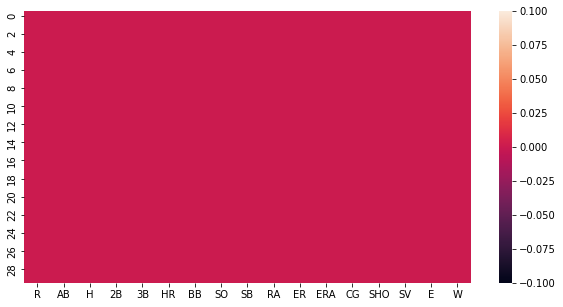

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull())

#### From above graph we find that there is no null value present in the dataset

#### 

# Summary of the Dataset

In [15]:
df.info()  # basic summary of the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       30 non-null     int64  
 1   AB      30 non-null     int64  
 2   H       30 non-null     int64  
 3   2B      30 non-null     int64  
 4   3B      30 non-null     int64  
 5   HR      30 non-null     int64  
 6   BB      30 non-null     int64  
 7   SO      30 non-null     int64  
 8   SB      30 non-null     int64  
 9   RA      30 non-null     int64  
 10  ER      30 non-null     int64  
 11  ERA     30 non-null     float64
 12  CG      30 non-null     int64  
 13  SHO     30 non-null     int64  
 14  SV      30 non-null     int64  
 15  E       30 non-null     int64  
 16  W       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [16]:
df.describe() # quick summary of dataset

R           AB            H          2B         3B  \
count   30.000000    30.000000    30.000000   30.000000  30.000000   
mean   688.233333  5516.266667  1403.533333  274.733333  31.300000   
std     58.761754    70.467372    57.140923   18.095405  10.452355   
min    573.000000  5385.000000  1324.000000  236.000000  13.000000   
25%    651.250000  5464.000000  1363.000000  262.250000  23.000000   
50%    689.000000  5510.000000  1382.500000  275.500000  31.000000   
75%    718.250000  5570.000000  1451.500000  288.750000  39.000000   
max    891.000000  5649.000000  1515.000000  308.000000  49.000000   

               HR          BB          SO          SB          RA          ER  \
count   30.000000   30.000000    30.00000   30.000000   30.000000   30.000000   
mean   163.633333  469.100000  1248.20000   83.500000  688.233333  635.833333   
std     31.823309   57.053725   103.75947   22.815225   72.108005   70.140786   
min    100.000000  375.000000   973.00000   44.000000  525.000000  478.000000   
25%    140.250000  428.250000  1157.50000   69.000000  636.250000  587.250000   
50%    158.500000  473.000000  1261.50000   83.500000  695.500000  644.500000   
75%    177.000000  501.250000  1311.50000   96.500000  732.500000  679.250000   
max    232.000000  570.000000  1518.00000  134.000000  844.000000  799.000000   

             ERA         CG        SHO         SV           E           W  
count  30.000000  30.000000  30.000000  30.000000   30.000000   30.000000  
mean    3.956333   3.466667  11.300000  43.066667   94.333333   80.966667  
std     0.454089   2.763473   4.120177   7.869335   13.958889   10.453455  
min     2.940000   0.000000   4.000000  28.000000   75.000000   63.000000  
25%     3.682500   1.000000   9.000000  37.250000   86.000000   74.000000  
50%     4.025000   3.000000  12.000000  42.000000   91.000000   81.000000  
75%     4.220000   5.750000  13.000000  46.750000   96.750000   87.750000  
max     5.040000  11.000000  21.000000  62.000000  126.000000  100.000000

<AxesSubplot:>

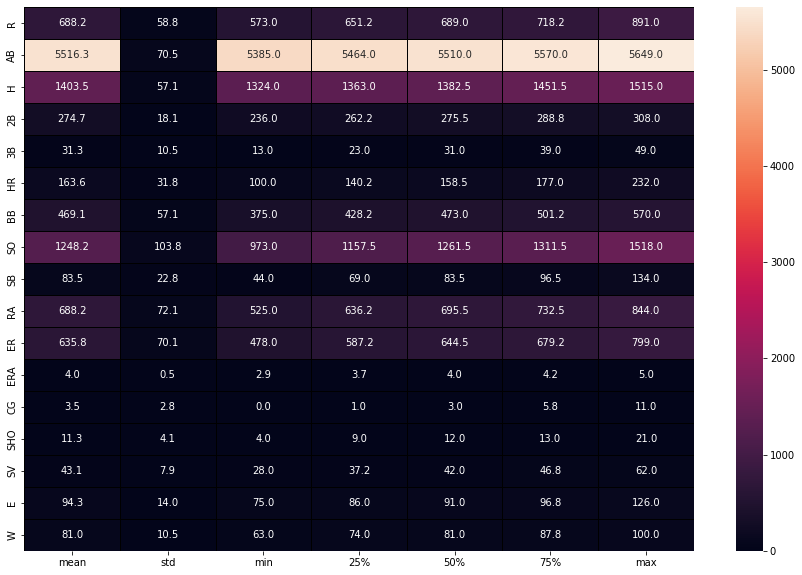

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), linewidths = 1, linecolor = 'black', annot = True, fmt = '.1f' )

#### From above information we find that max values of BB, SO, RA, ER, CG are much higher than its mean values. Due to these  BB, SO, RA, ER, CG probably having outliers in the dataset.

#### 

# Exploratory Data Analysis

#### 

# Scatter Plot

#### Checking Univariate Analysis with respect to predicted Wins

In [18]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'W'],
      dtype='object')

## Runs with respect to Wins

<AxesSubplot:xlabel='R', ylabel='W'>

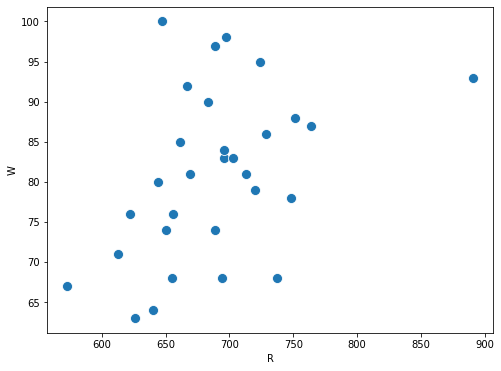

In [19]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'R', y = 'W', data = df, s = 100)

#### From above graph we find that as the number of runs increases win rate also increases

#### 

### AB (At Bats) with respect to Wins

<AxesSubplot:xlabel='AB', ylabel='W'>

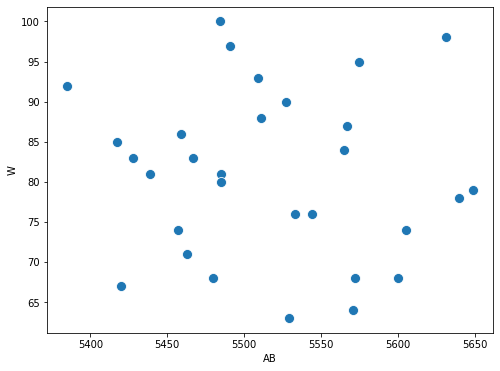

In [20]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'AB', y = 'W', data = df, s = 100)

At Bat is a batter's turn batting against a pitcher with respect to wins show a disorted graph.

Possibilty of wins also increases with AB at some places of graph.

#### 

### Hits with respect to Wins

<AxesSubplot:xlabel='H', ylabel='W'>

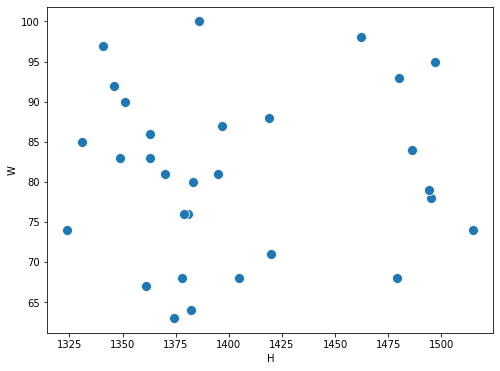

In [21]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'H', y = 'W', data = df, s = 100)

#### As per above observations we find that increase in Hits also increases the Wins numbers.

#### 

### 2B (Doubles) with respect to Wins

<AxesSubplot:xlabel='2B', ylabel='W'>

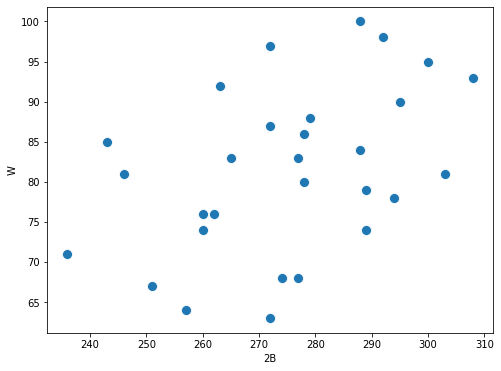

In [22]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = '2B', y = 'W', data = df, s = 100)

#### Doubles increases linearly respectively the win numbers are also increases. 

#### 

### 3B Triples with respect to Wins

<AxesSubplot:xlabel='3B', ylabel='W'>

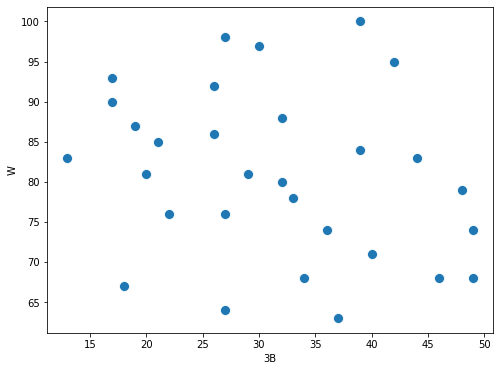

In [23]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = '3B', y = 'W', data = df, s = 100)

#### As per above graph we find that wins number decreases with respect to increase in triples.

#### 

### Homeruns with respect to Wins

<AxesSubplot:xlabel='HR', ylabel='W'>

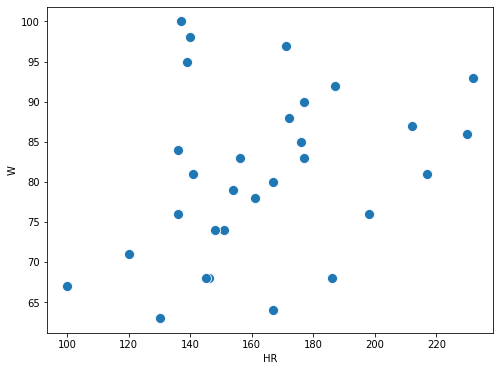

In [24]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'HR', y = 'W', data = df, s = 100)

#### Linearly increment in Homeruns shows highest number of wins.

#### 

### Base on Balls i.e Walks with respect to Wins

<AxesSubplot:xlabel='BB', ylabel='W'>

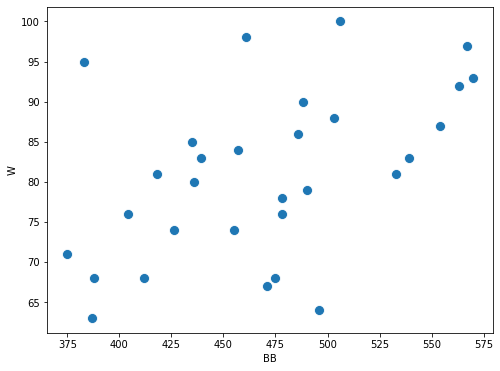

In [25]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'BB', y = 'W', data = df, s = 100)

#### As per above observations we find that increase in Walks increases the Wins numbers.

#### 

### Strikeouts with respect to Wins

<AxesSubplot:xlabel='SO', ylabel='W'>

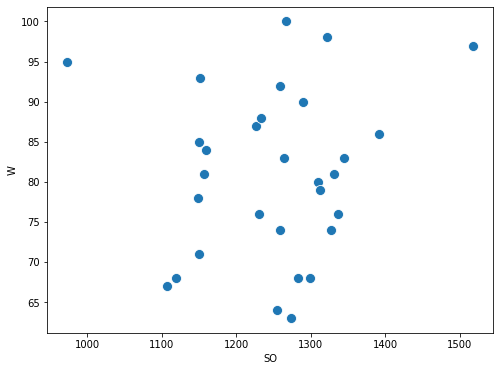

In [26]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'SO', y = 'W', data = df, s = 100)

#### Strikeout having maximum ranges between 1100 to 1400 with respect to wins.

#### 

### Stolen Bases with respect to Wins

<AxesSubplot:xlabel='SB', ylabel='W'>

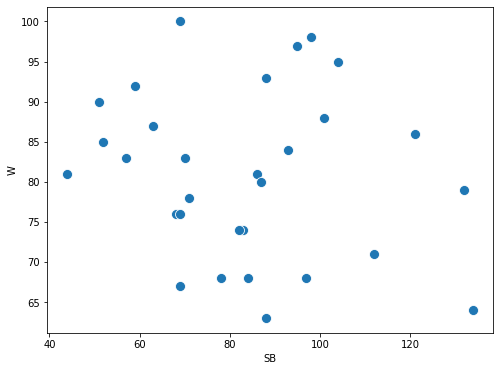

In [27]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'SB', y = 'W', data = df, s = 100)

#### Stolen base occurs when a runner advances to a base to which he is not entitled and the official scorer rules that the advance should be credited to the action of the runner.
With stolen base increase wins probability increases but as per graph wins chances decreases when stolen base are greater than 100

#### 

### Runs Allowed with respect to Wins

<AxesSubplot:xlabel='RA', ylabel='W'>

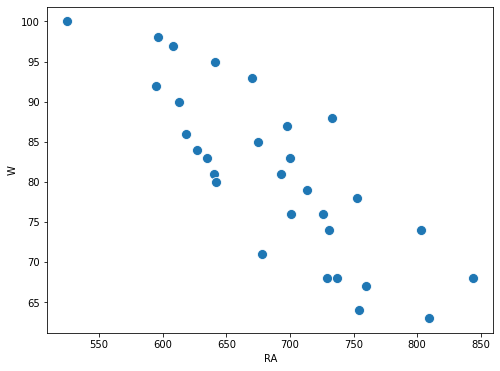

In [28]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'RA', y = 'W', data = df, s = 100)

#### Increase in run allowed decreases the number of wins of the team.

#### 

### Earned Runs with respect to Wins

<AxesSubplot:xlabel='ER', ylabel='W'>

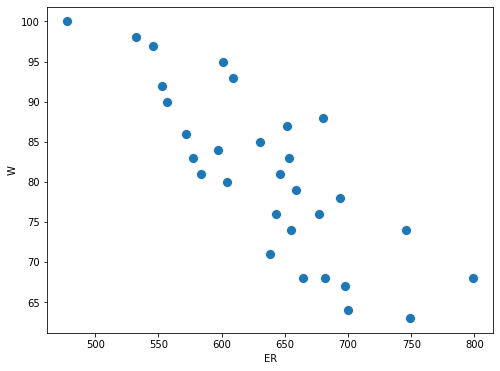

In [29]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'ER', y = 'W', data = df, s = 100)

#### Same as run allowed , increase in earned runs decreases the number of wins. 

#### 

### Earned Run Average with respect to Wins

<AxesSubplot:xlabel='ERA', ylabel='W'>

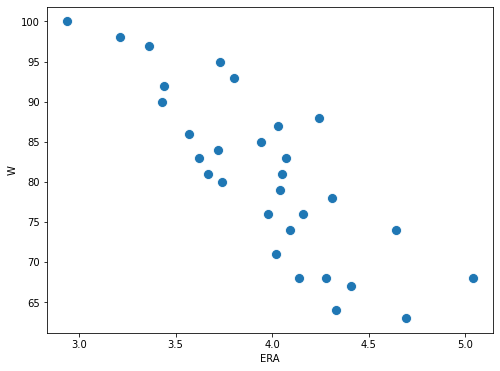

In [30]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'ERA', y = 'W', data = df, s = 100)

#### Increase in average earned runs decreases the number of wins.

#### 

### Complete Games with respect to Wins

<AxesSubplot:xlabel='CG', ylabel='W'>

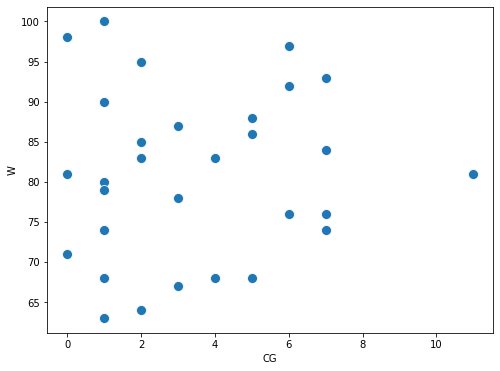

In [31]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'CG', y = 'W', data = df, s = 100)

#### From above graph we find that complete games ranges between 0 to 7 approx.

#### 

### Shutouts with respect to Wins

<AxesSubplot:xlabel='SHO', ylabel='W'>

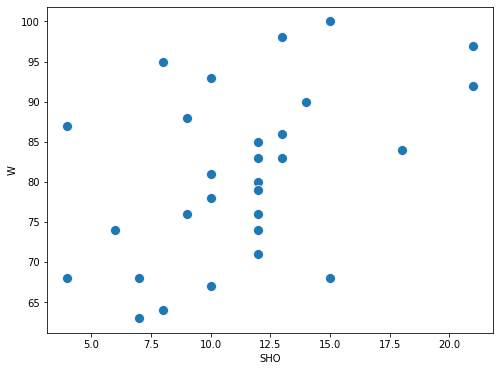

In [32]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'SHO', y = 'W', data = df, s = 100)

#### Shutouts increase respectively wins also increase.

SHO shows a line at 12.5 with wins range between 70 to 85 numbers.

#### 

### Saves with respect to Wins

<AxesSubplot:xlabel='SV', ylabel='W'>

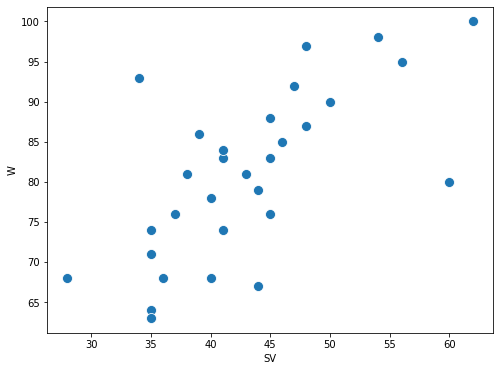

In [33]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'SV', y = 'W', data = df, s = 100)

#### Wins increases with respect to number of saves.

#### 

### Errors with respect to Wins

<AxesSubplot:xlabel='E', ylabel='W'>

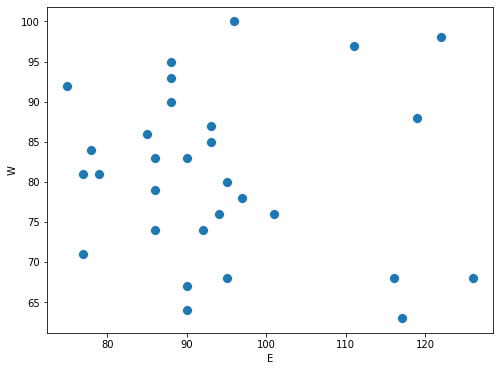

In [34]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'E', y = 'W', data = df, s = 100)

#### All errors can only be charged if the player's actions a foul which directly benefit the other team in wins.

#### 

### Wins

<AxesSubplot:xlabel='W', ylabel='W'>

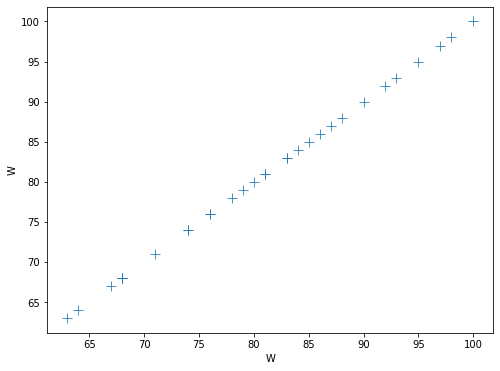

In [35]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'W', y = 'W', data = df, s = 100, marker = "+")

#### 

## Bivariate Analysis with respect to each dataset columns

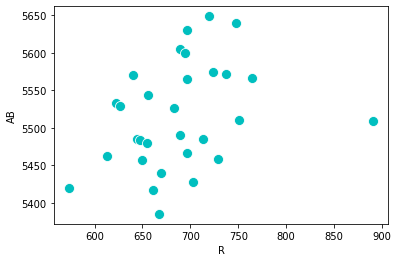

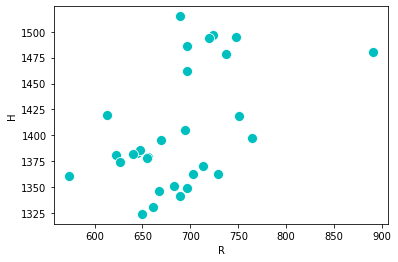

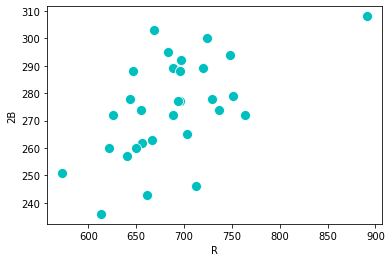

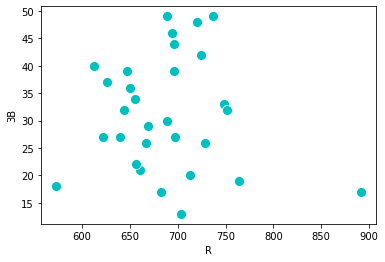

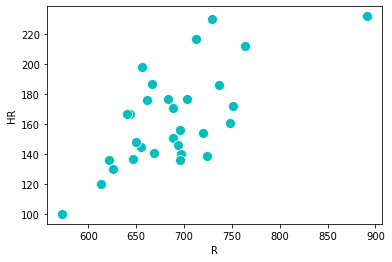

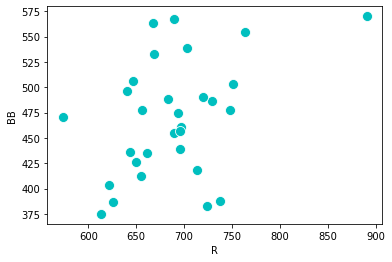

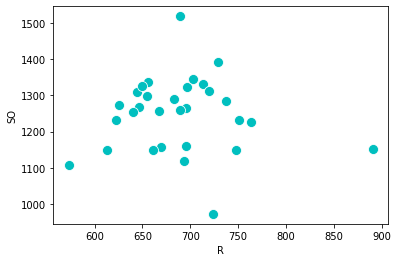

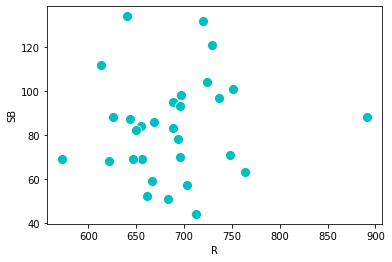

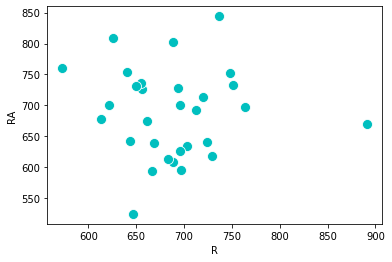

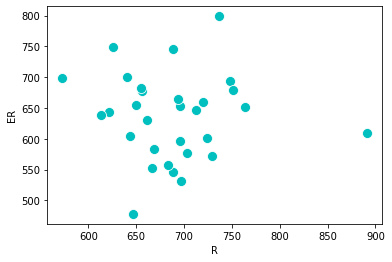

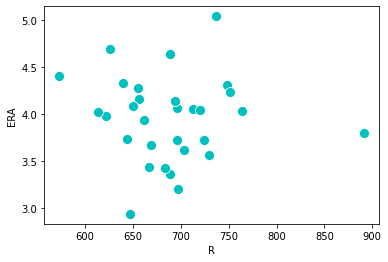

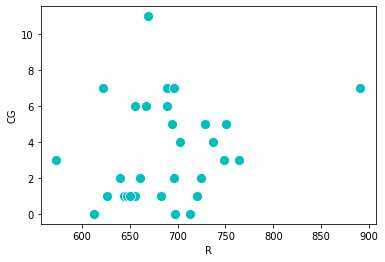

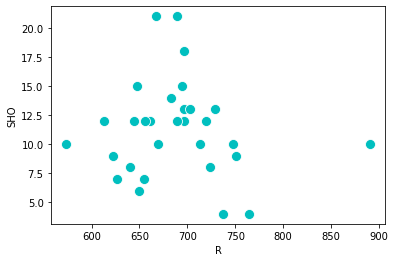

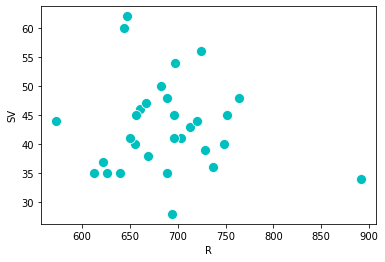

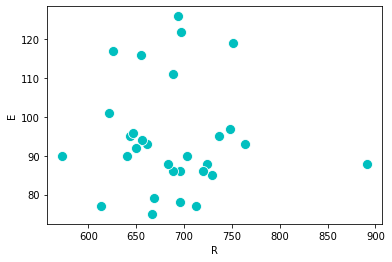

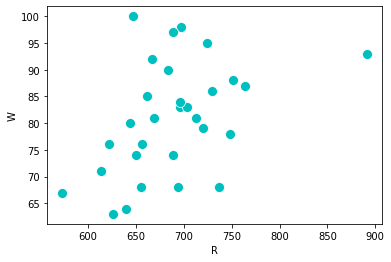

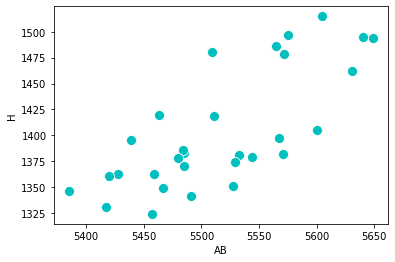

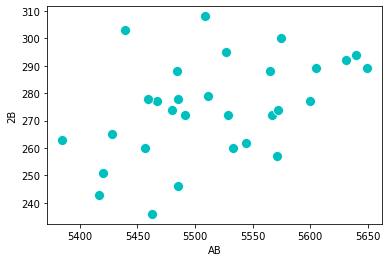

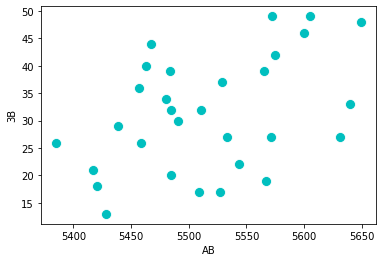

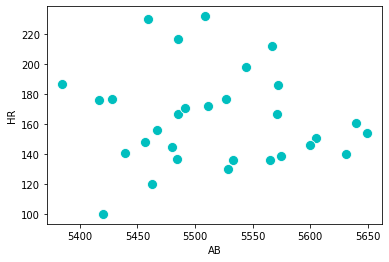

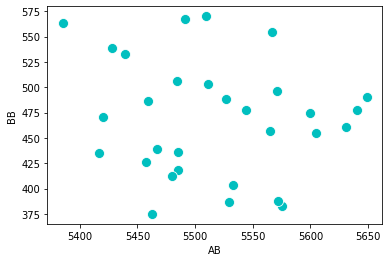

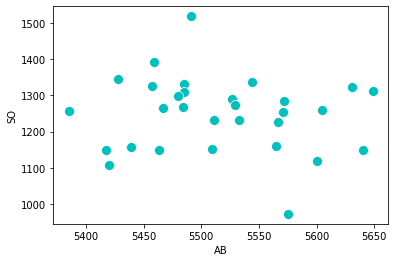

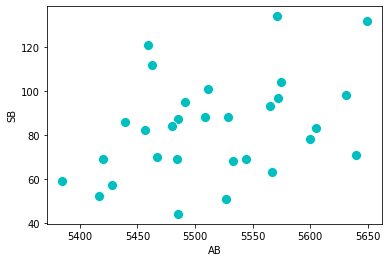

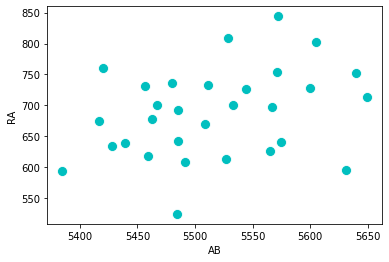

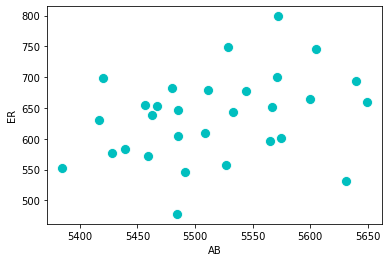

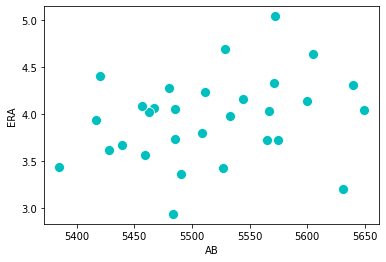

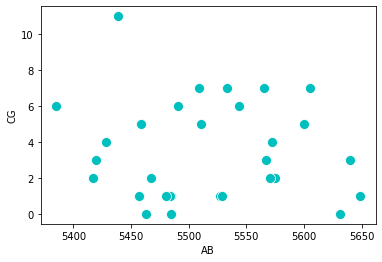

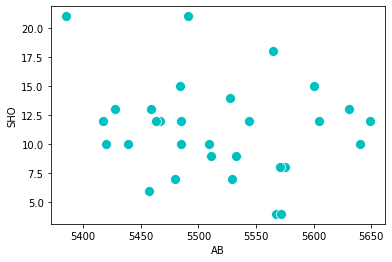

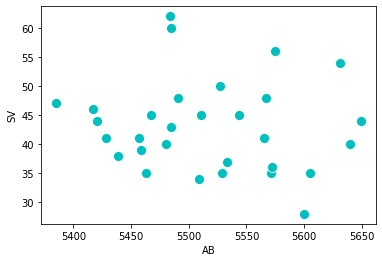

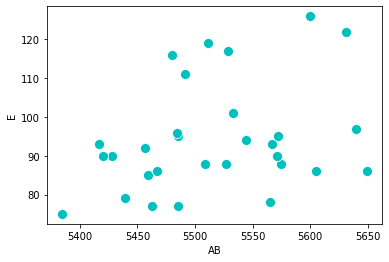

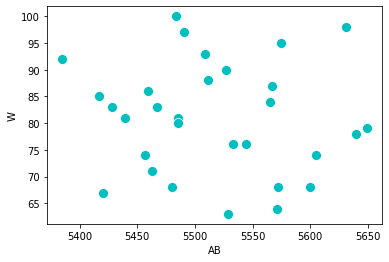

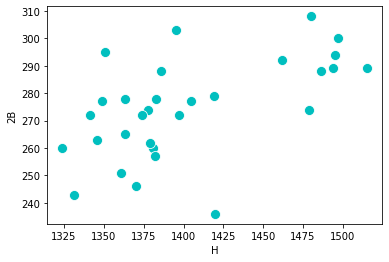

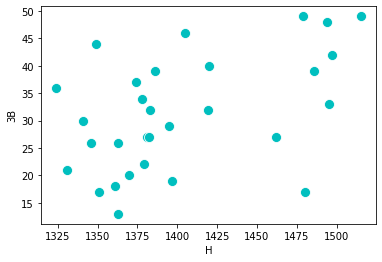

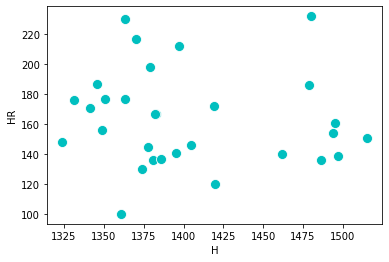

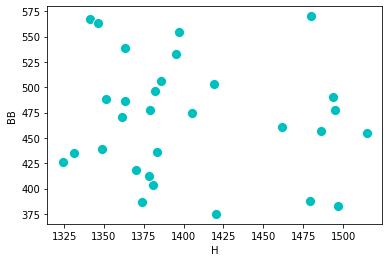

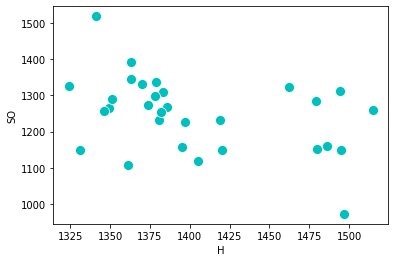

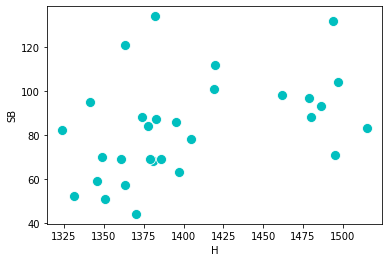

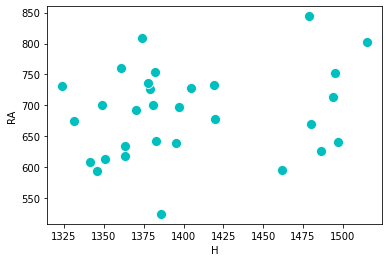

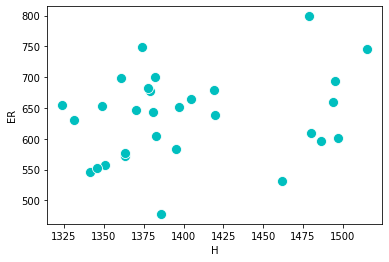

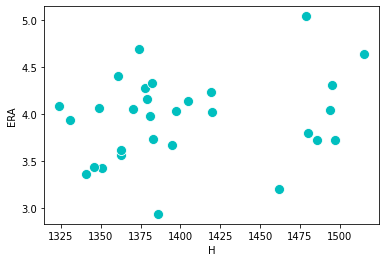

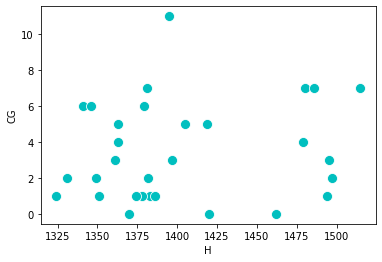

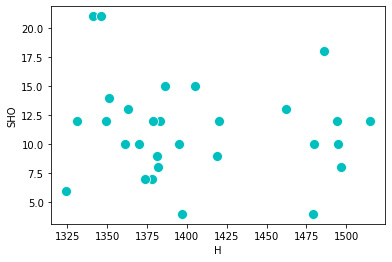

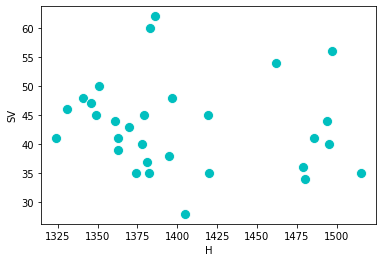

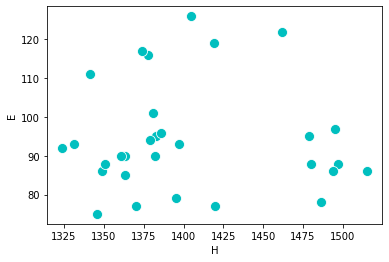

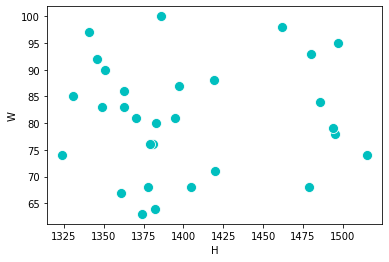

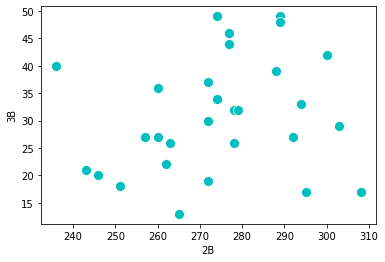

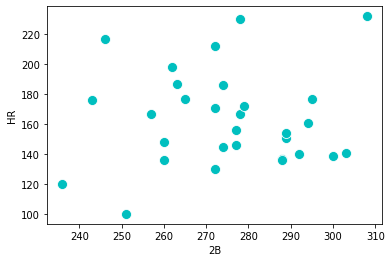

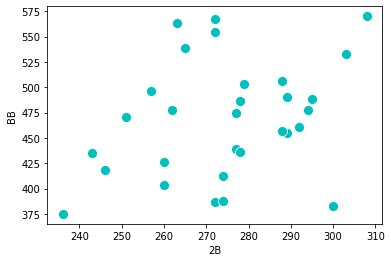

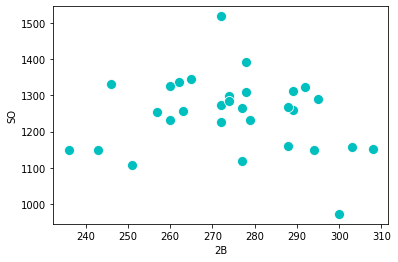

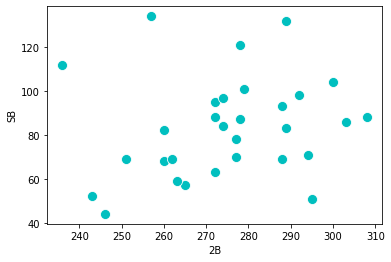

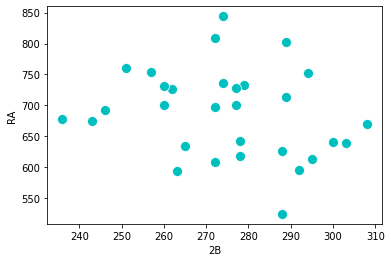

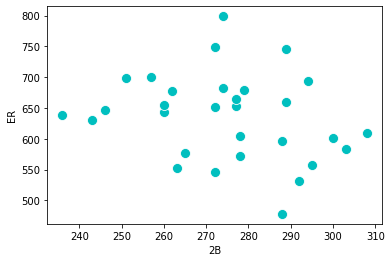

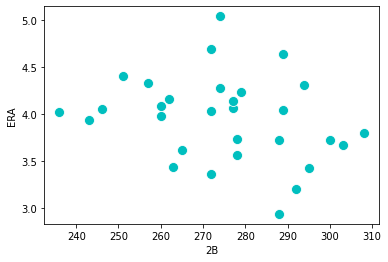

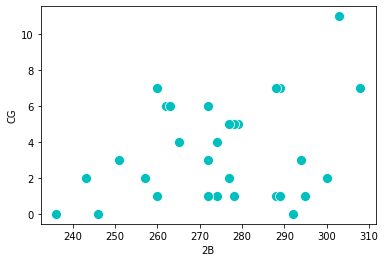

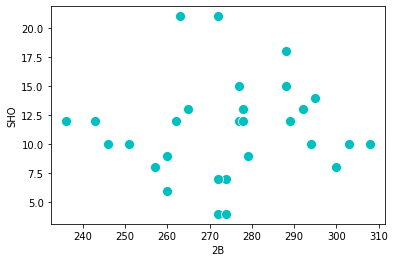

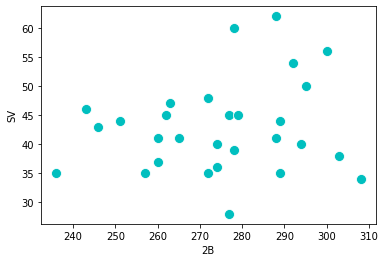

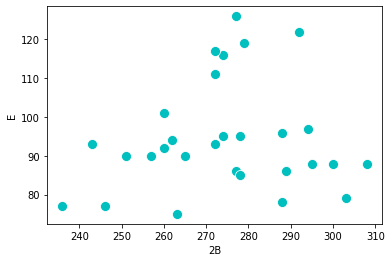

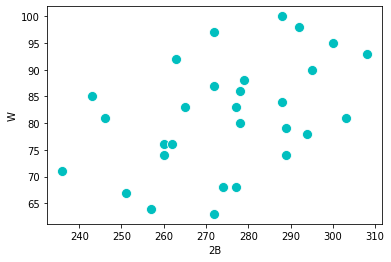

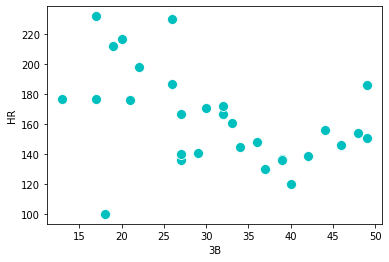

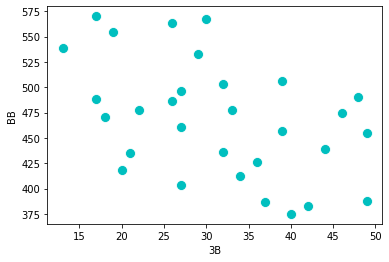

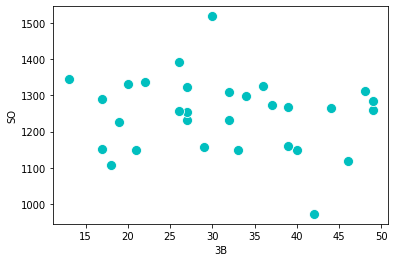

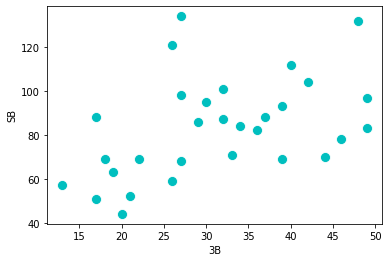

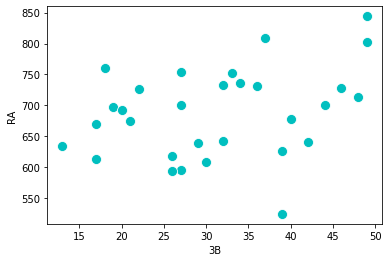

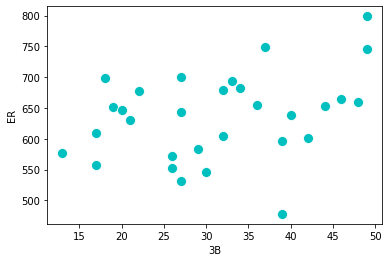

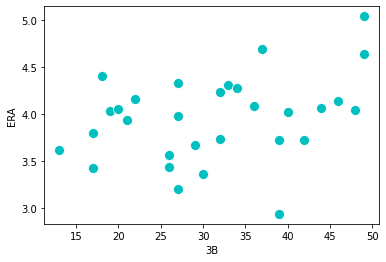

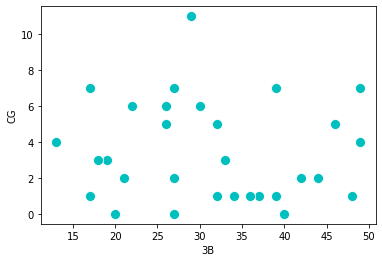

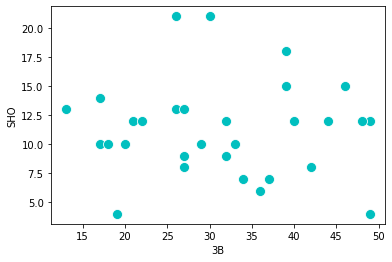

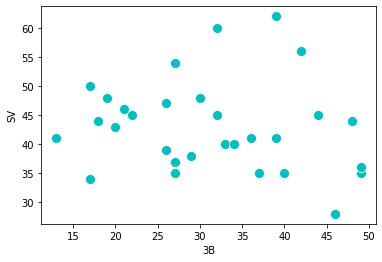

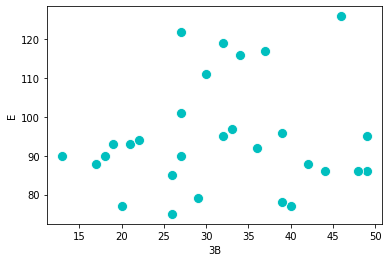

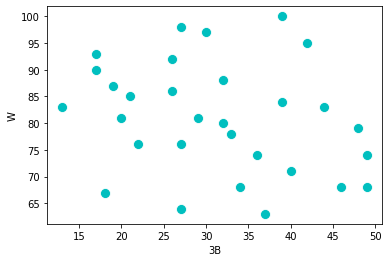

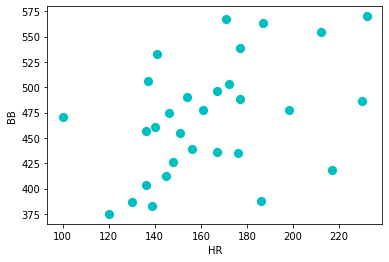

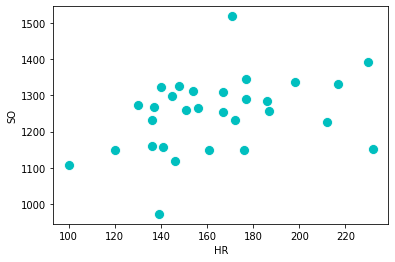

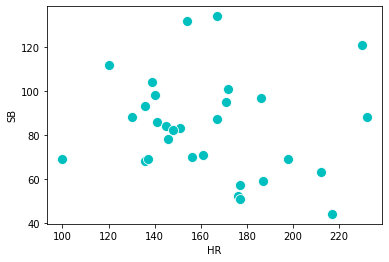

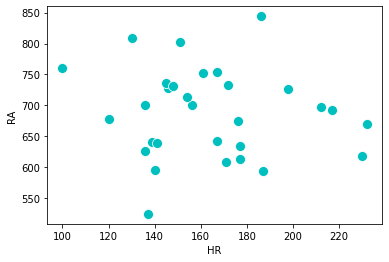

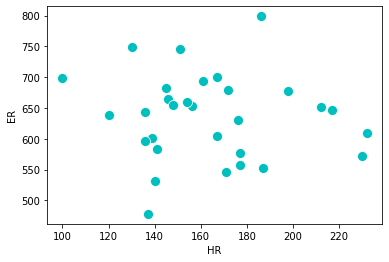

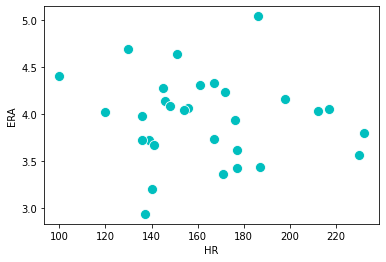

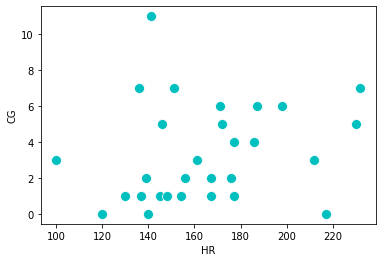

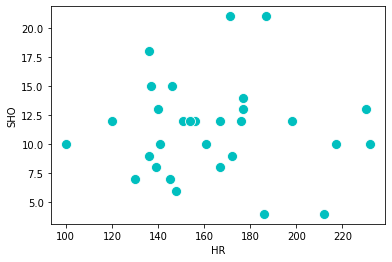

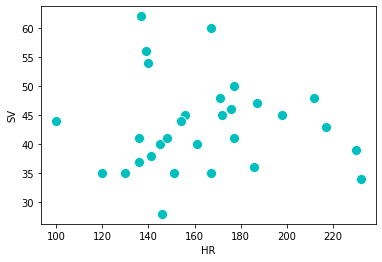

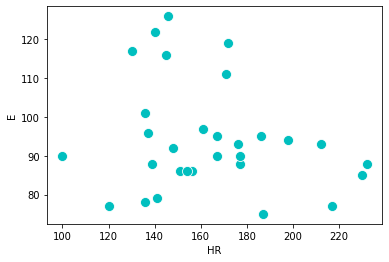

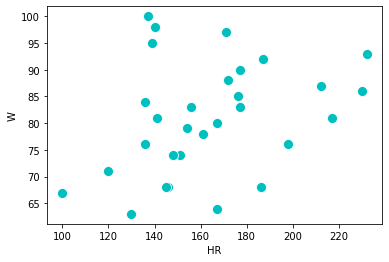

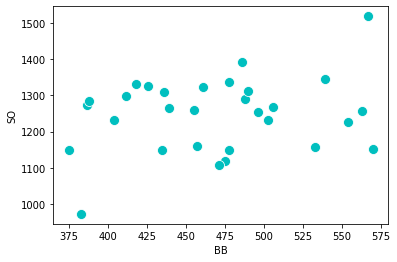

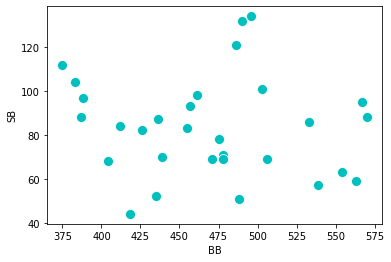

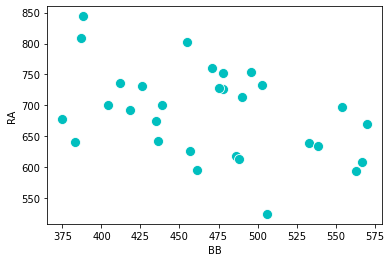

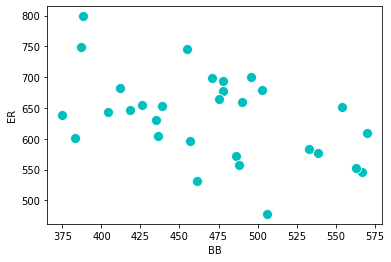

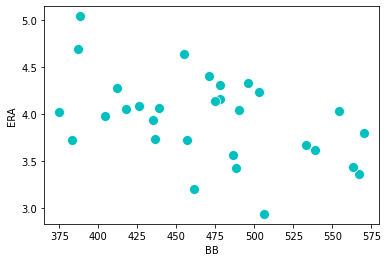

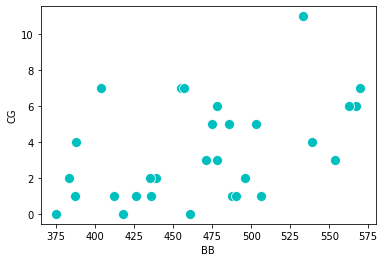

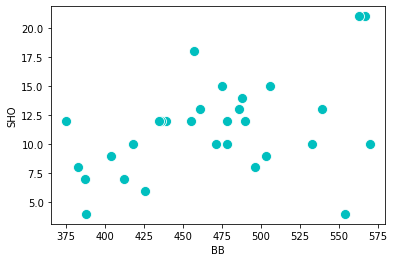

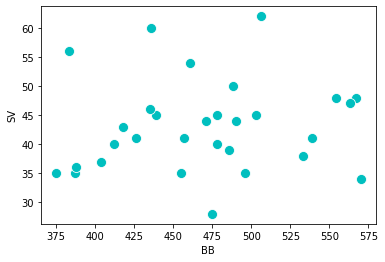

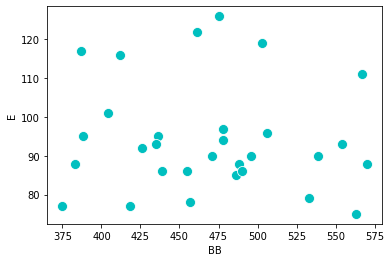

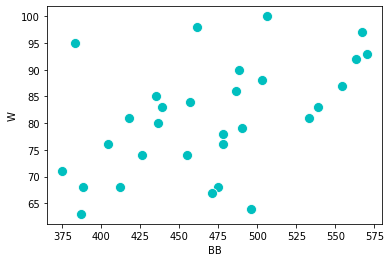

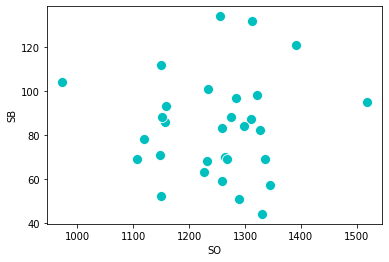

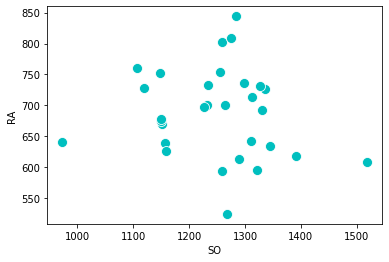

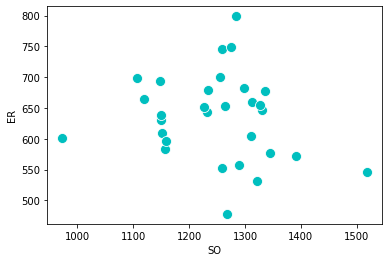

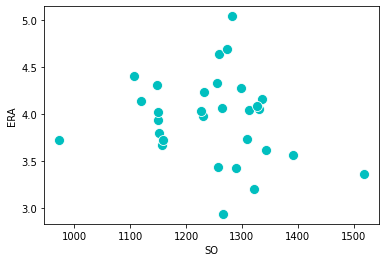

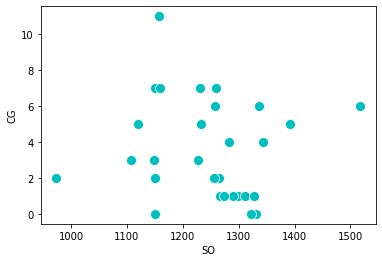

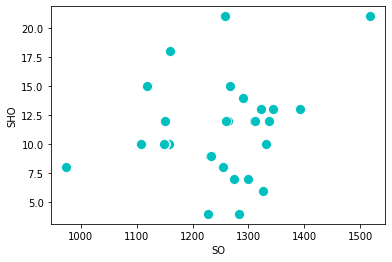

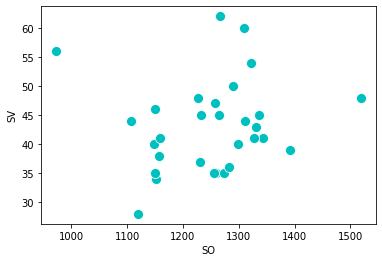

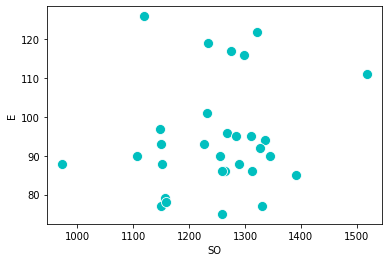

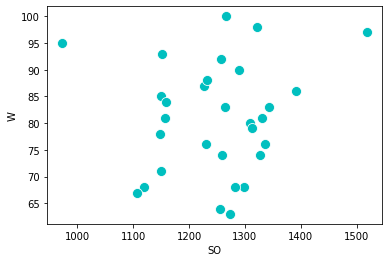

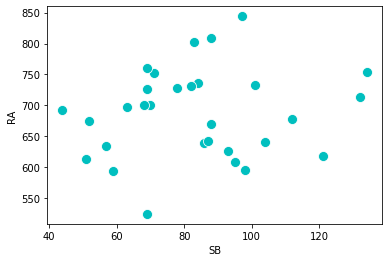

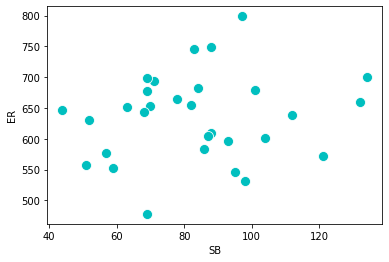

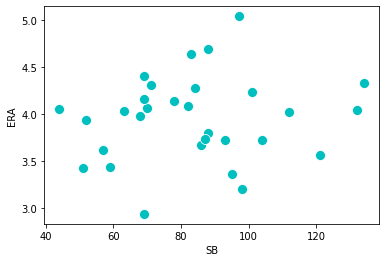

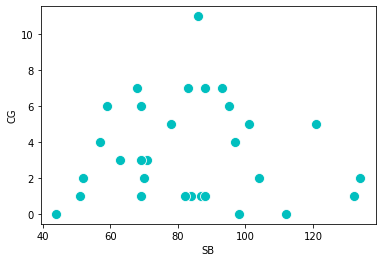

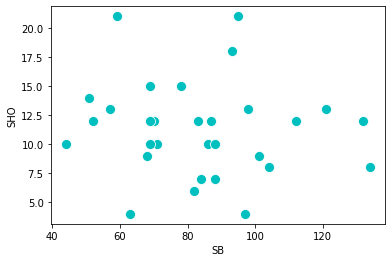

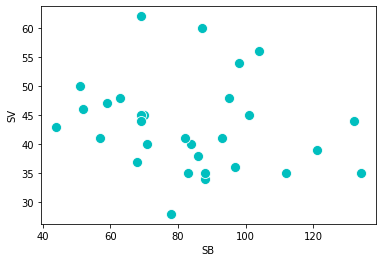

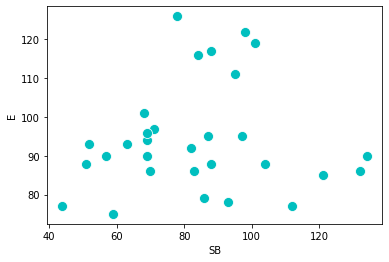

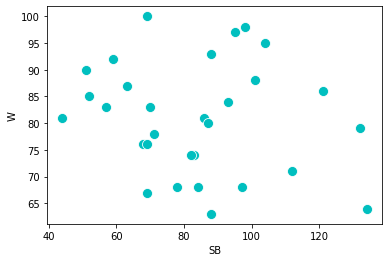

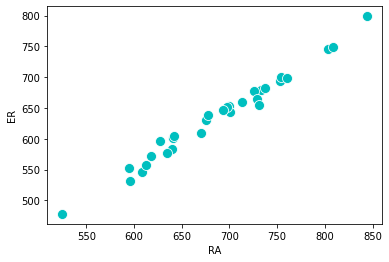

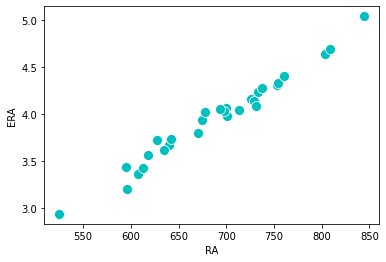

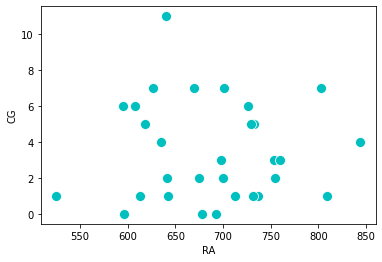

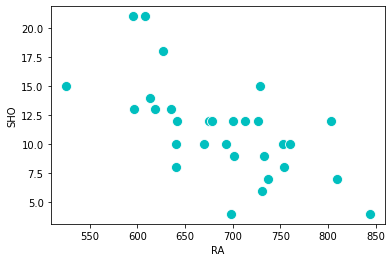

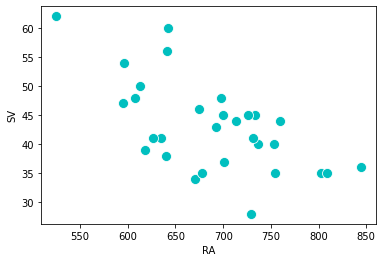

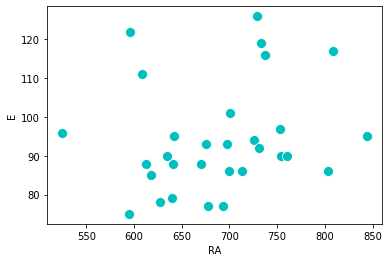

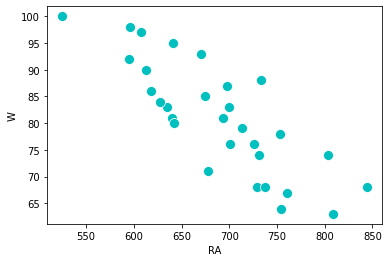

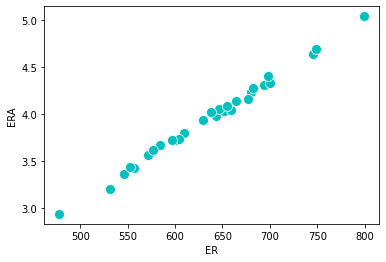

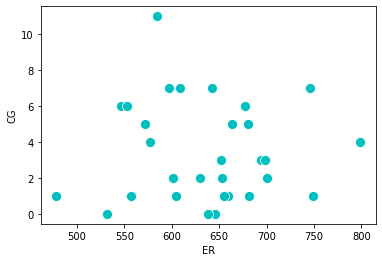

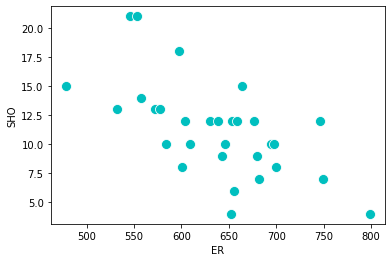

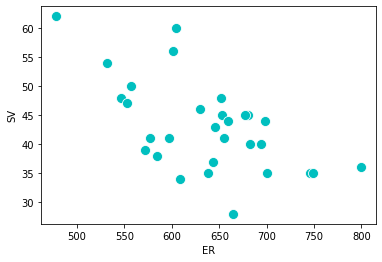

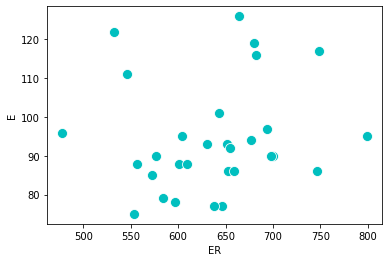

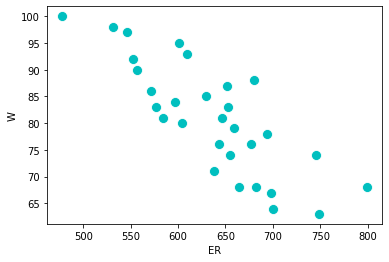

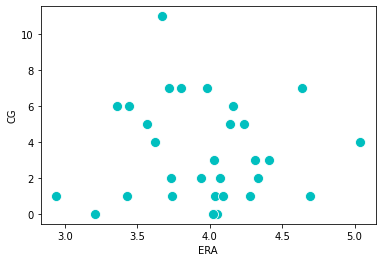

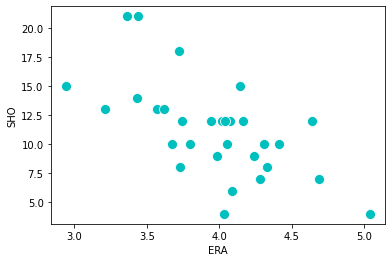

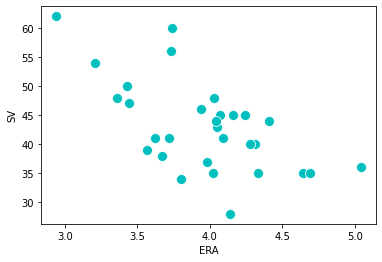

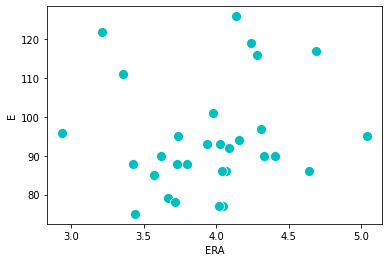

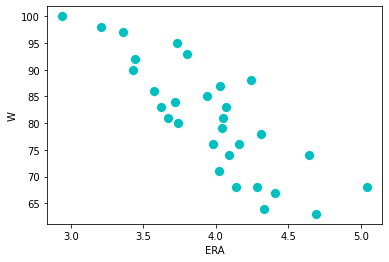

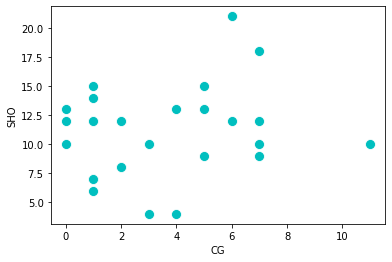

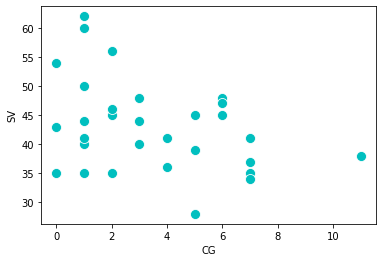

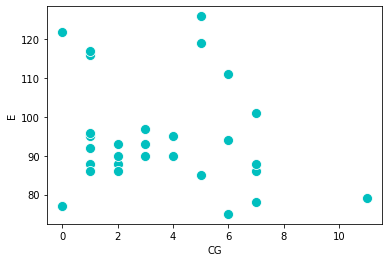

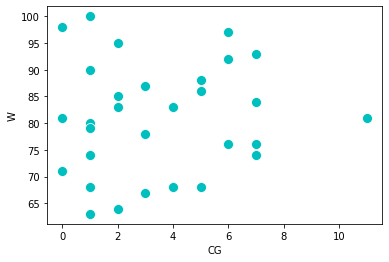

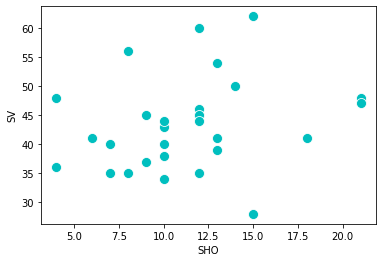

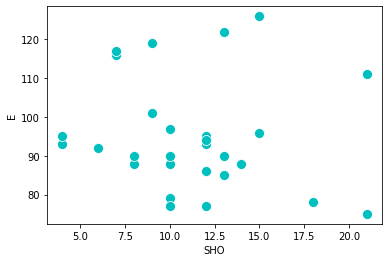

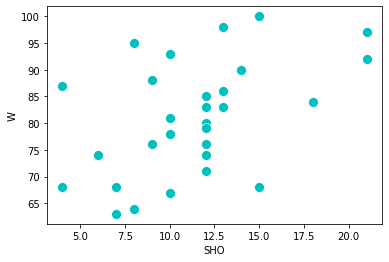

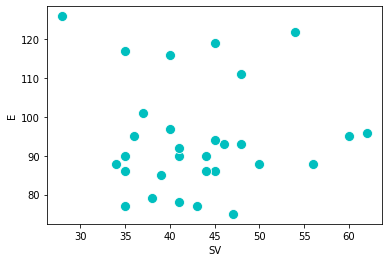

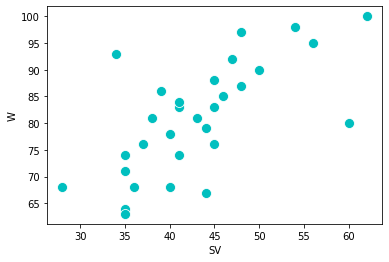

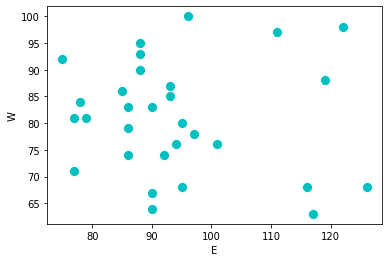

In [36]:
for i in range(len(df.columns)):
    for j in df.columns[i+1:]:
        plt.figure(figsize = (6,4))
        sns.scatterplot(df[df.columns[i]], df[j], color = 'c', s = 100)
        plt.show()

#### Observations:
    
1. Runs shows increament with all dataset.

2. AB increases with all dataset but with wins its show disorted graphs with increment in wins.

3. Hits shows disorted graph and increment in hits also increase all the dataset values.

4. 2B are in the range of 1100 to 1400 approx with respect to SO.
Rest dataset increases with the increase in 2B.

5. 3B, HR, BB, SO, SB shows increment with respect to other columns dataset.

6. RA linearly increases with the ER, ERA dataset columns.
On RA increament wins number will be less.

7. ERA shows negative relation with Wins.
ER also show negative relation with Wins.

8. SV, SHO, CG shows increament with the other dataset.

9. ERA with respect to W, SV, SHO shows negative relation with each other.
Increases in ERA values number of wins will be decrease.

10. ER with respect to W, SV, SHO shows negative relation with each other.
Increases in ER values number of wins will be decrease.
ERA and ER shows same behaviour with respect to other dataset.

11. RA with respect to SHO, SV shows negative increaement as the value of RA increases.


# Swarm/Strip Plot

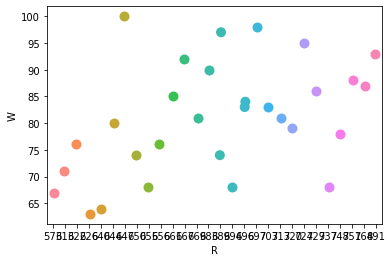

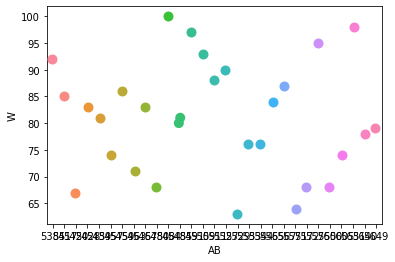

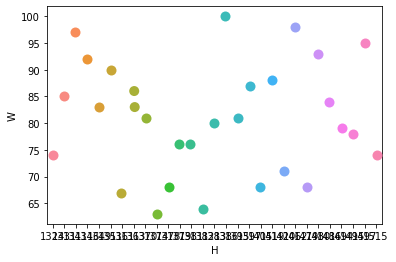

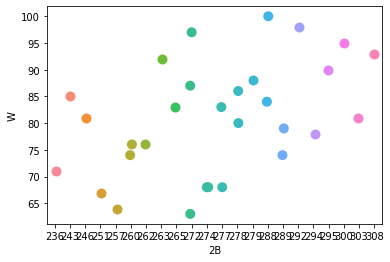

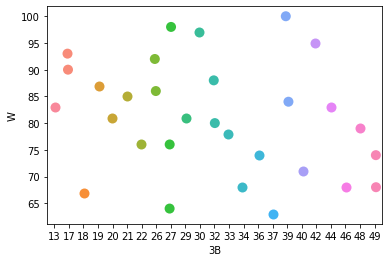

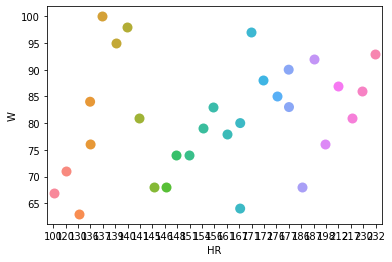

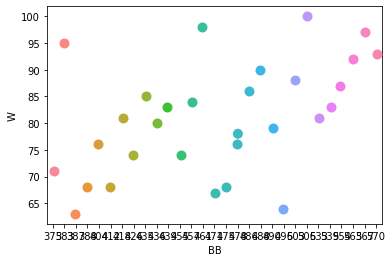

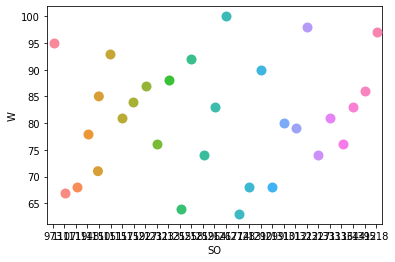

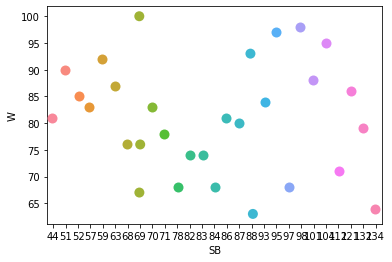

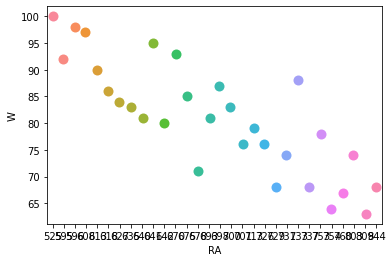

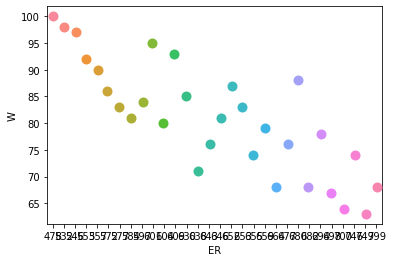

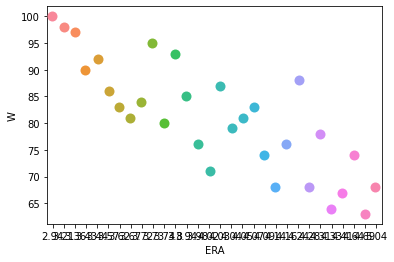

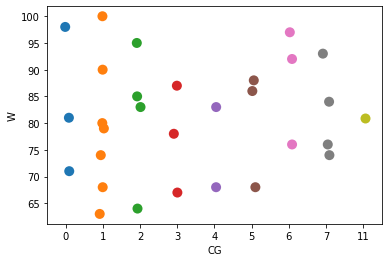

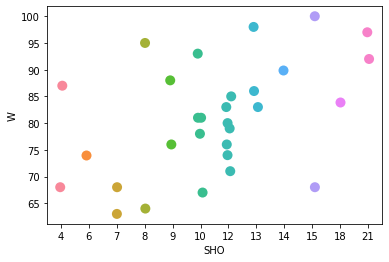

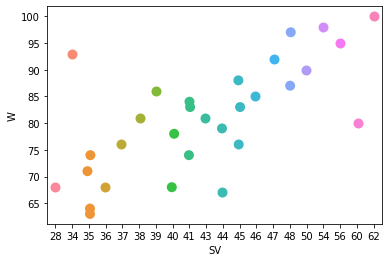

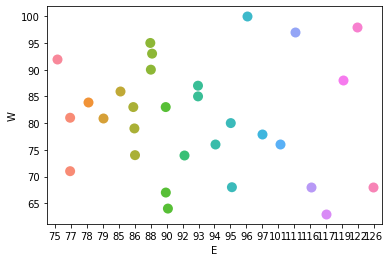

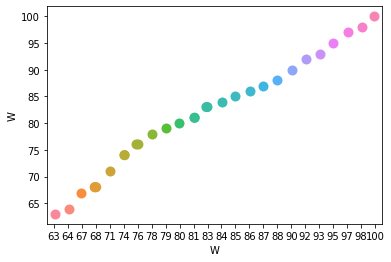

In [37]:
for i in df.columns:
    plt.figure()
    sns.stripplot(x = df[i], y = df['W'], data = df, s = 10)
    
# for i in df.columns:
#     plt.figure()
#     sns.swarmplot(x = df[i], y = df['W'], data = df, s = 10)  #shows same graph

#### Observations: 
    
1. The number of runs increases win rate also increases.

2. At Bat is a batter's turn batting against a pitcher with respect to wins show a disorted graph. Possibilty of wins also increases with AB at some places of graph.

3. Increase in Hits also increases the Wins numbers.

4. Doubles increases linearly respectively the win numbers are also increases

5. Wins number decreases with respect to increase in triples.

6. Linearly increment in Homeruns, Walks shows highest number of wins.

7. Strikeout having maximum ranges between 1100 to 1400 with respect to wins.

8. Stolen base occurs when a runner advances to a base to which he is not entitled and the official scorer rules that the advance should be credited to the action of the runner.
With stolen base increase wins probability increases but as per graph wins chances decreases when stolen base are greater than 100.

9. Increase in run, earned runs, average run allowed allowed decreases the number of wins of the team.

10. Complete games ranges between 0 to 7 approx.

11. Shutouts increase respectively wins also increase.
SHO shows a line at 12.5 with wins range between 70 to 85 numbers.

12. Wins increases with respect to number of saves.

13. All errors can only be charged if the player's actions a foul which directly benefit the other team in wins.


# Inline Plot 

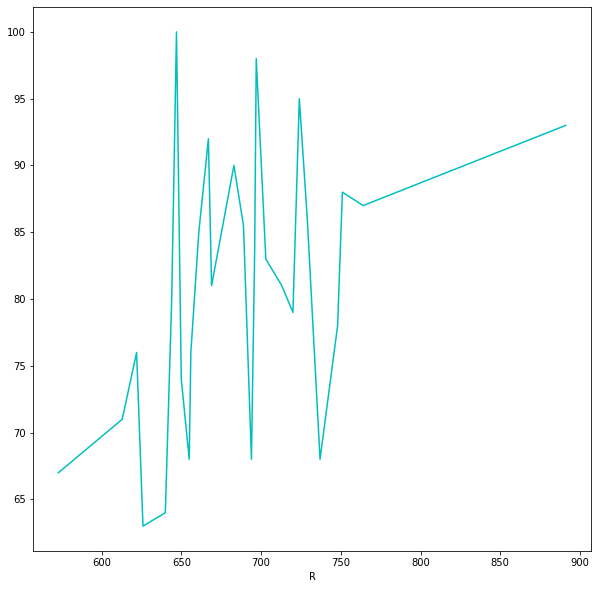

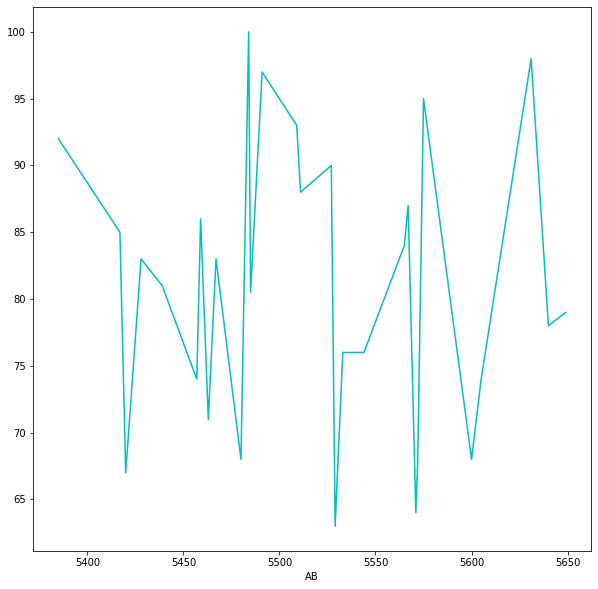

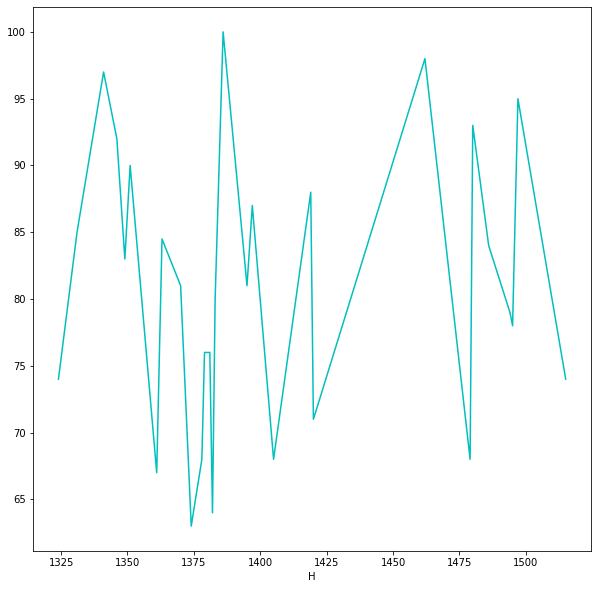

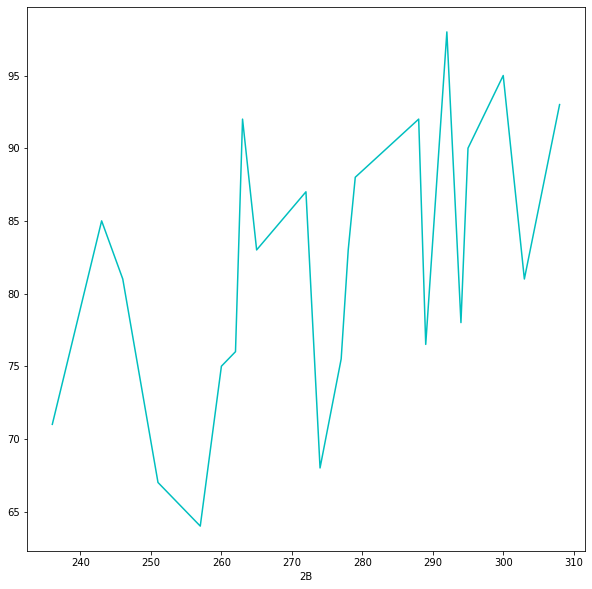

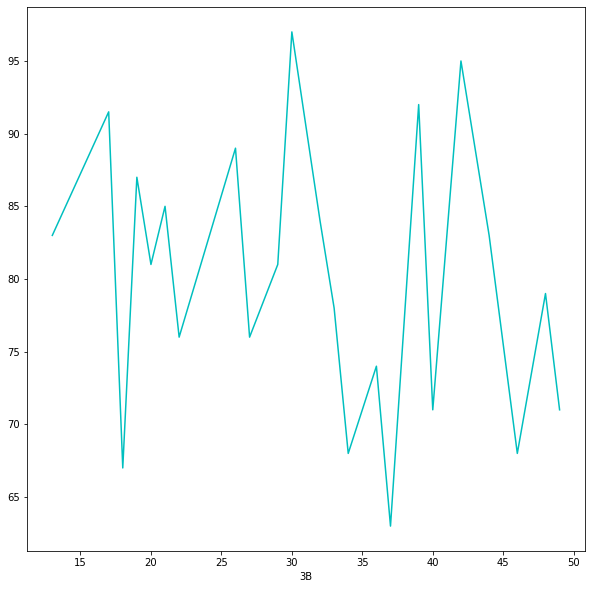

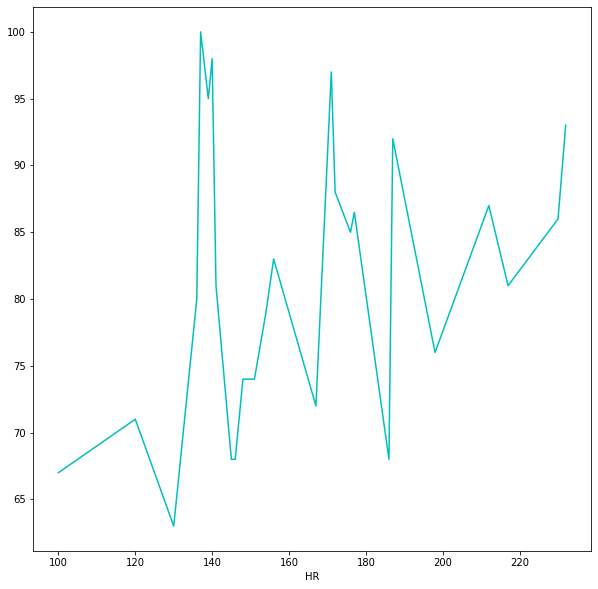

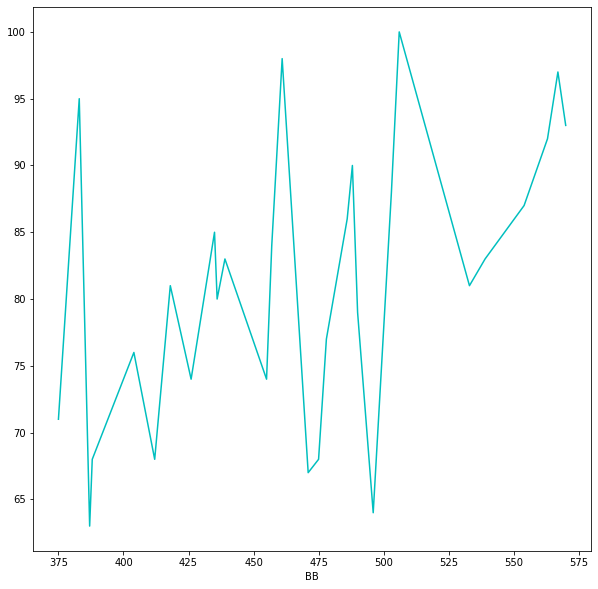

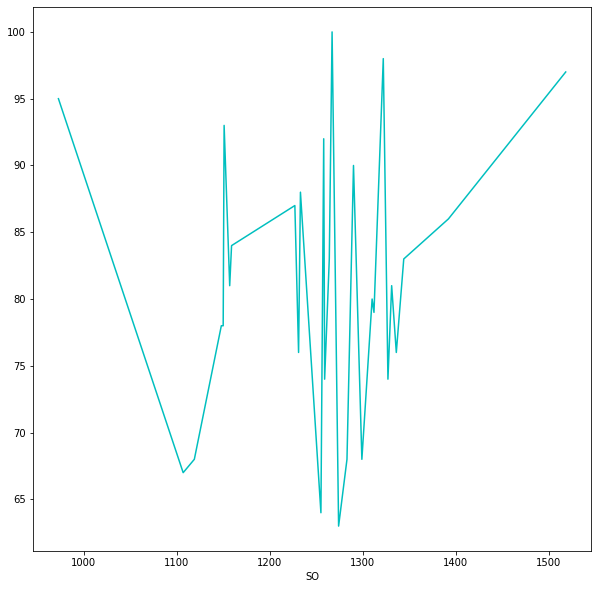

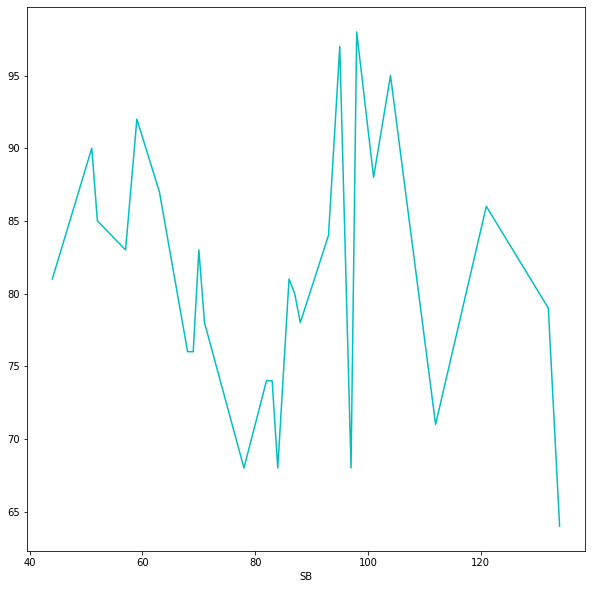

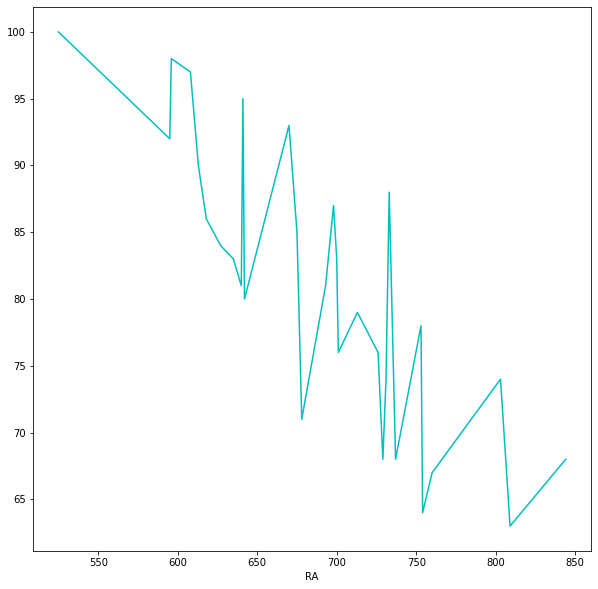

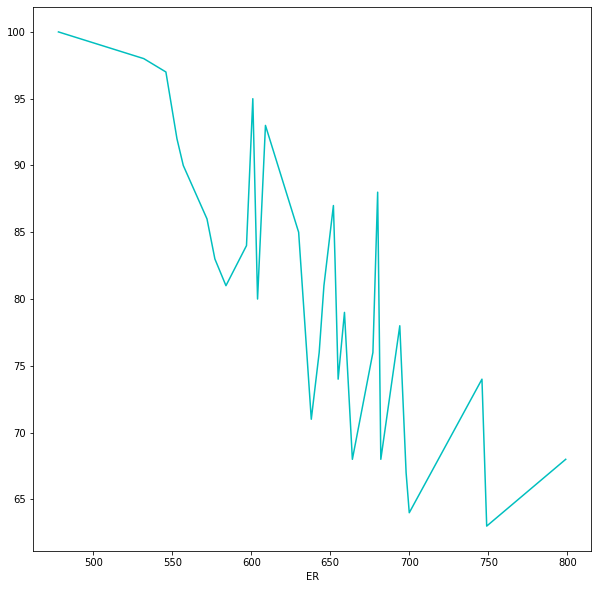

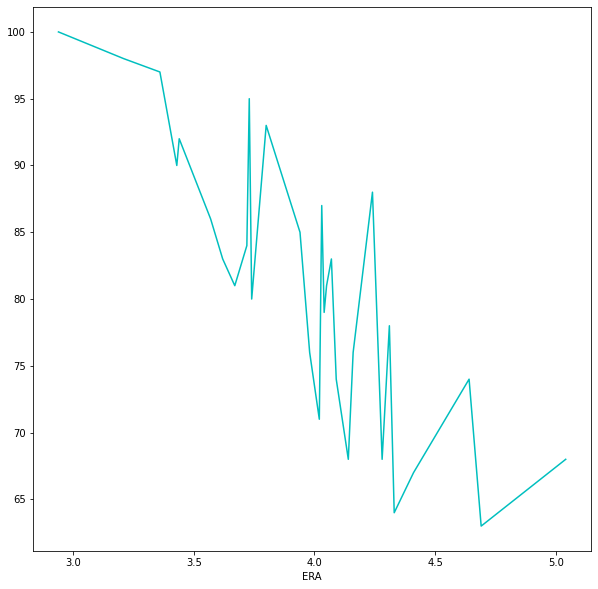

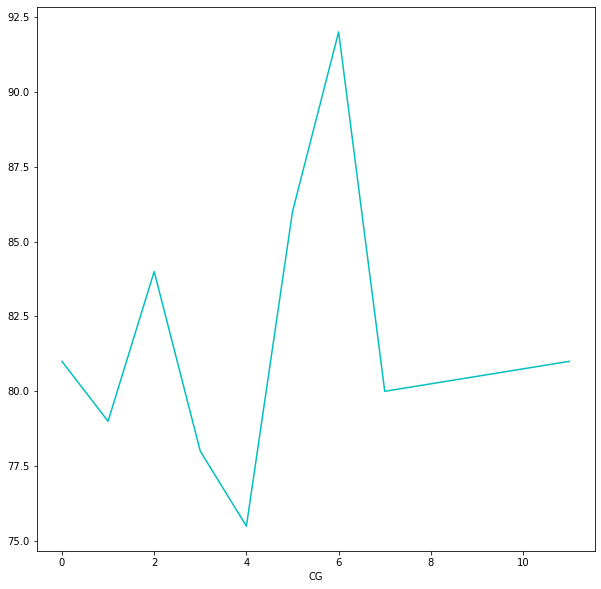

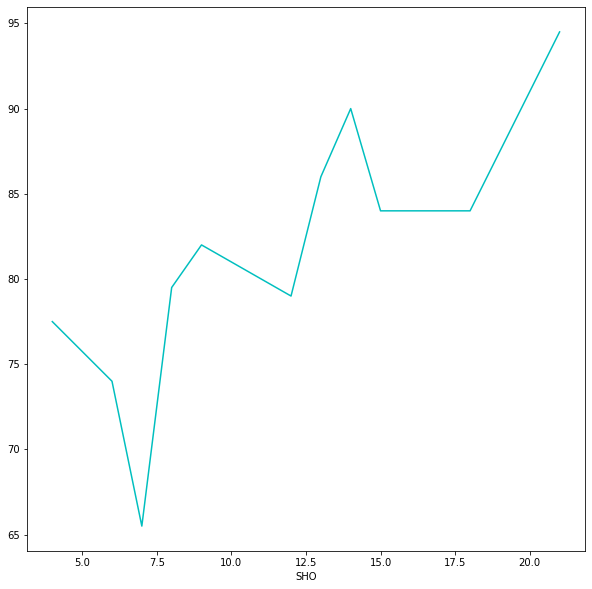

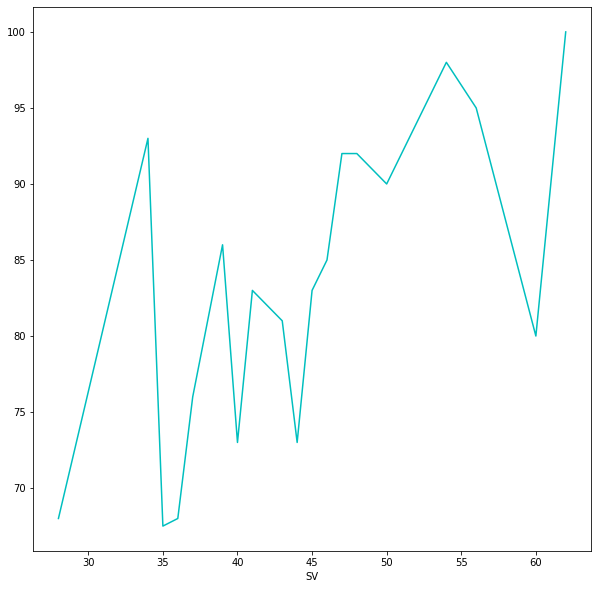

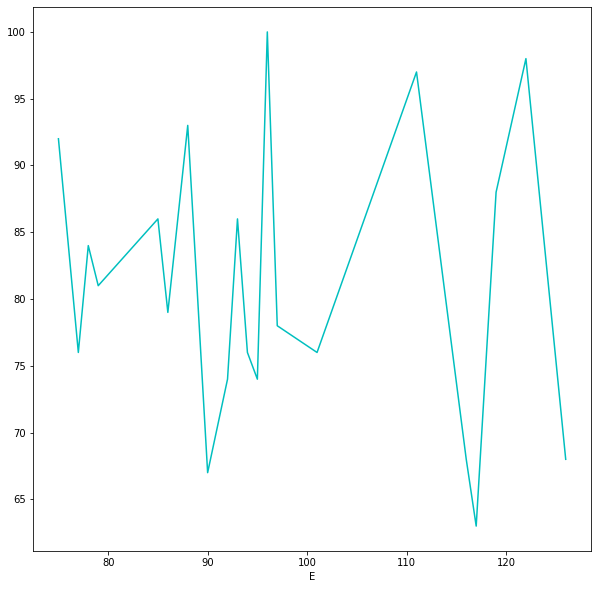

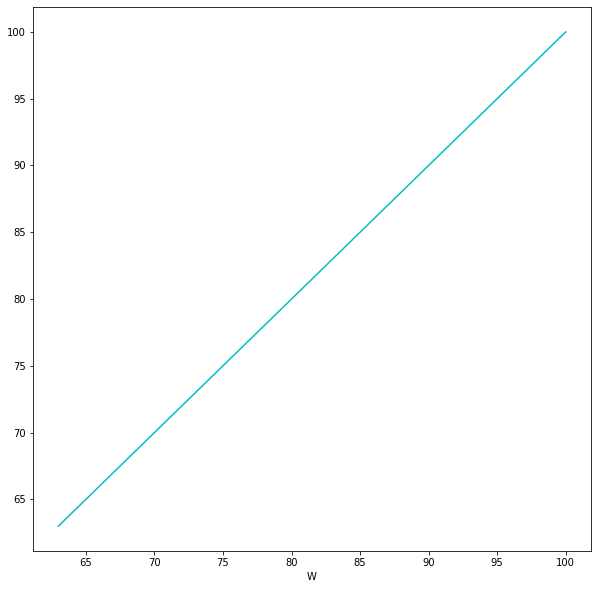

In [38]:
for i in df.columns:
    plt.figure(figsize = (10,10))
    df.groupby(i)['W'].median().plot(c = 'c')
    plt.show()

#### Observations: 
    
Above graphs shows how single data points connected to each other.

RA, ERA, ER shows decrement relation with respect to wins.

Rest other columns dataset shows postive increment with respect to wins.



#### 

# Violin Plot

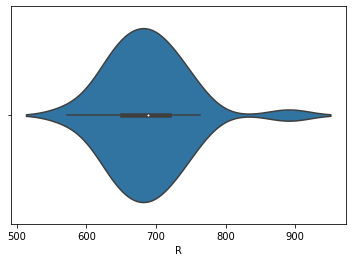

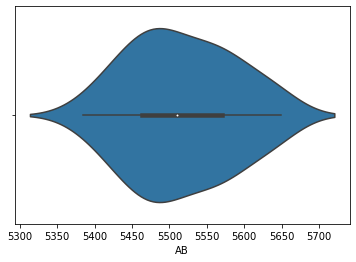

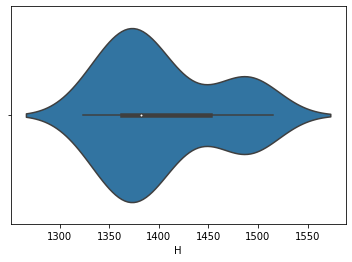

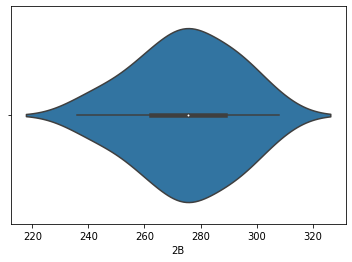

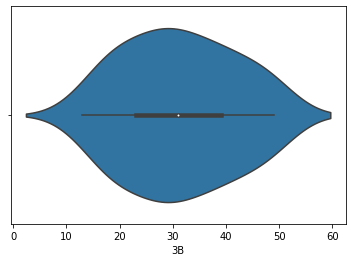

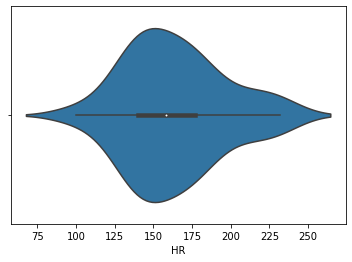

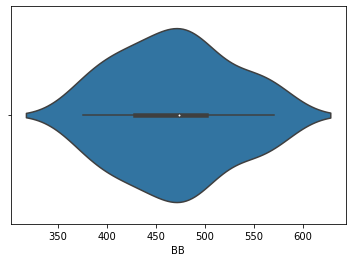

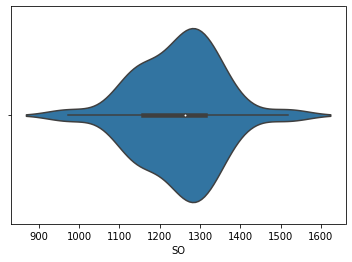

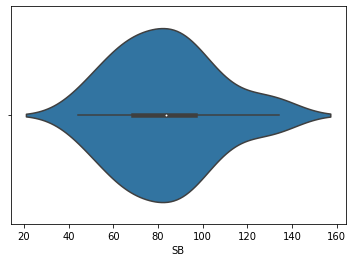

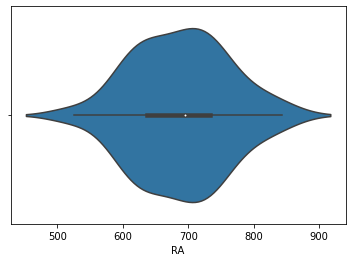

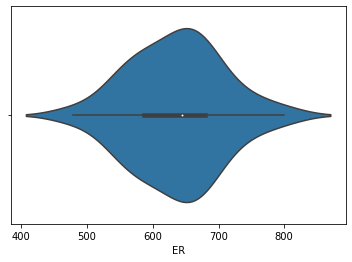

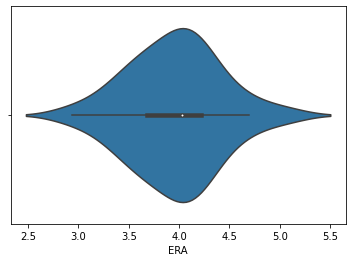

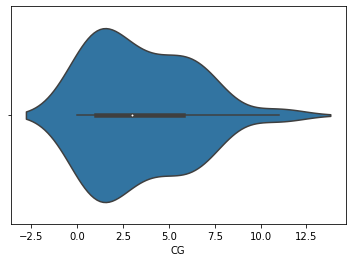

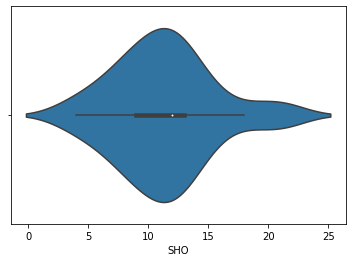

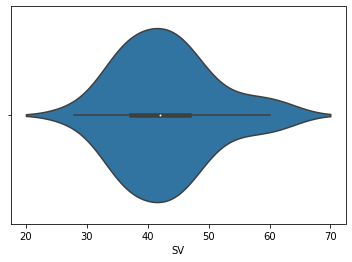

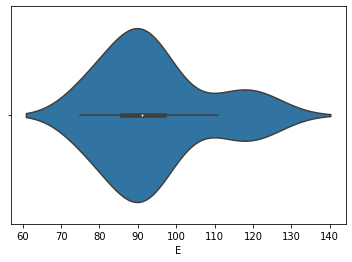

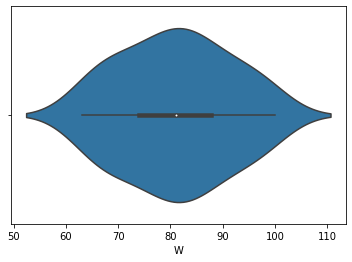

In [39]:
for i in df.columns:
    plt.figure()
    sns.violinplot(df[i] , data = df)
    
    
# checking spreading density of the data

#### From above spreading density we find that HR, SO, RA, ER, CG probably having outliers in the dataset.

#### 

# Checking frequencies of Wins

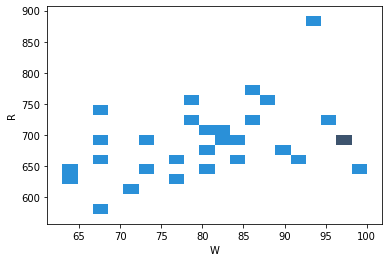

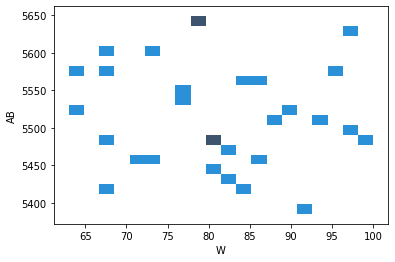

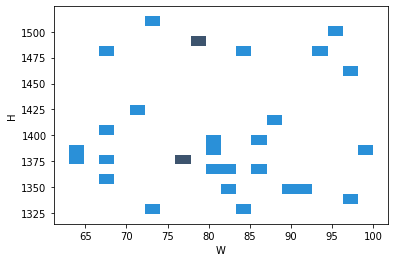

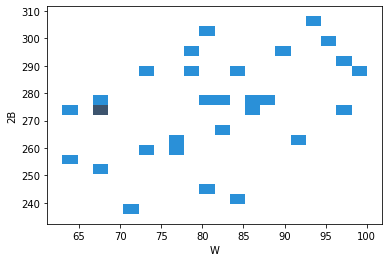

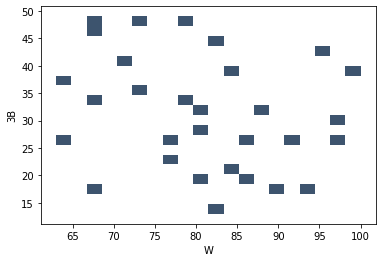

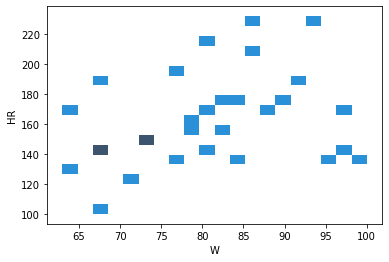

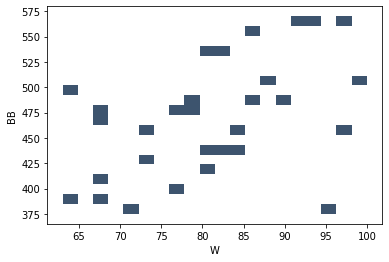

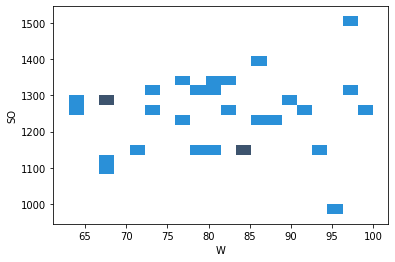

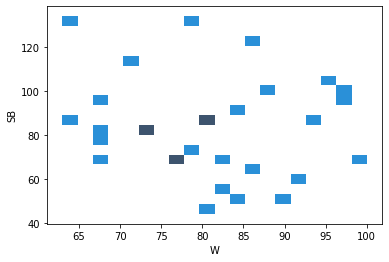

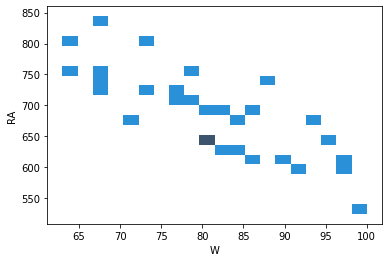

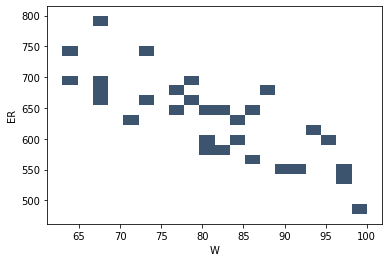

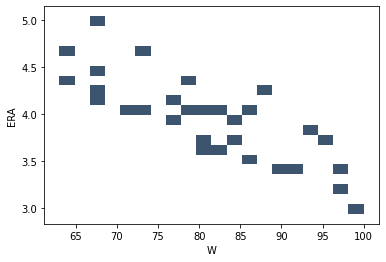

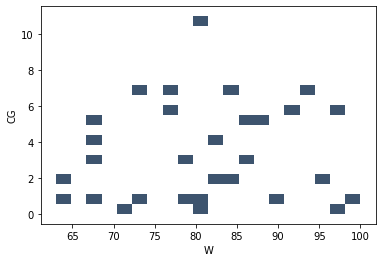

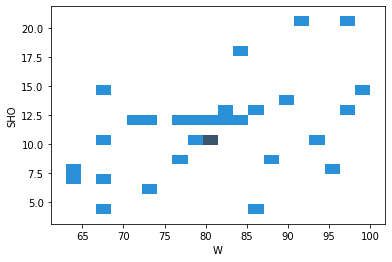

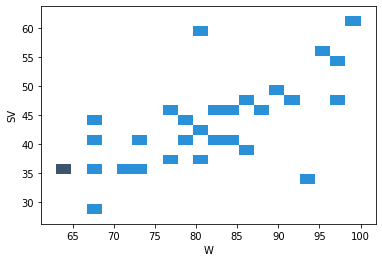

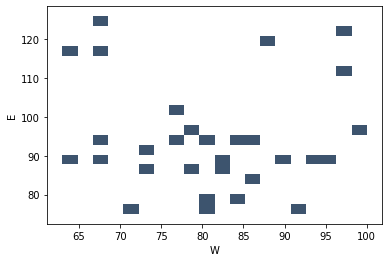

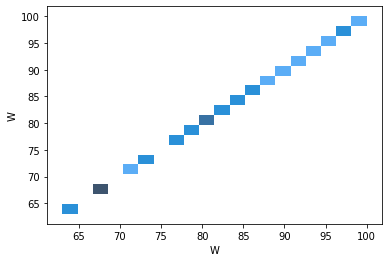

In [40]:
for i in df.columns:
    plt.figure()
    sns.histplot(x = df['W'], y = df[i],  bins = 20)
    plt.show()

#### From above observations we find that darker blues color shows wining frequencies if a team scores accordingly.

#### 

# Checking Outliers

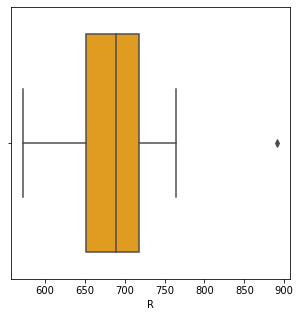

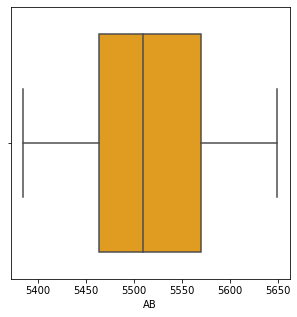

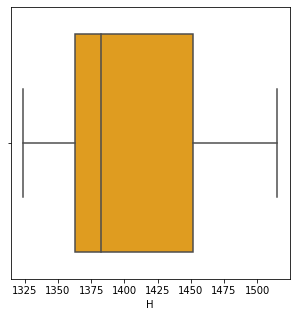

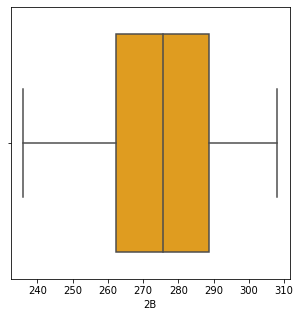

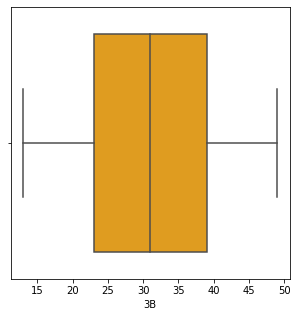

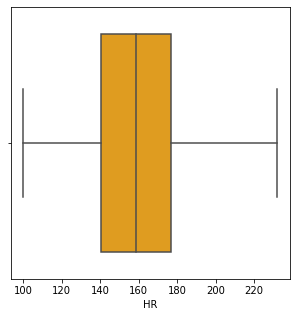

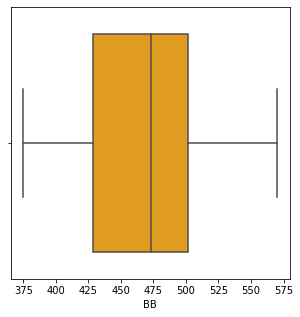

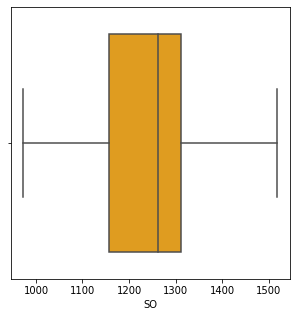

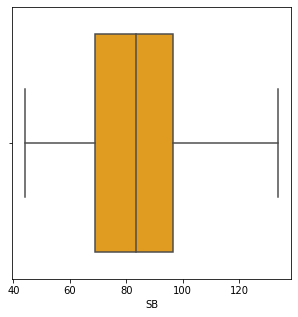

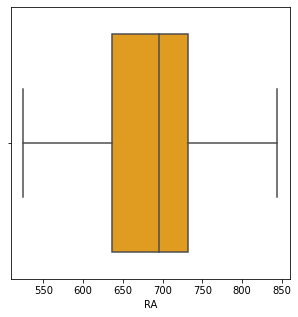

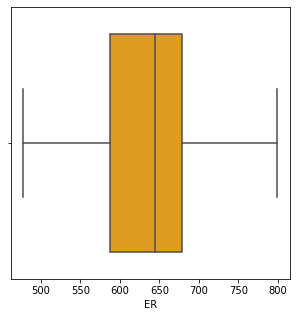

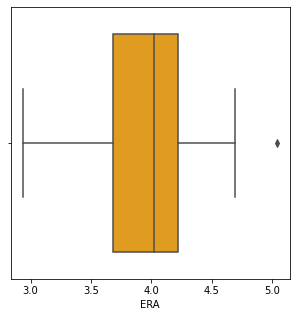

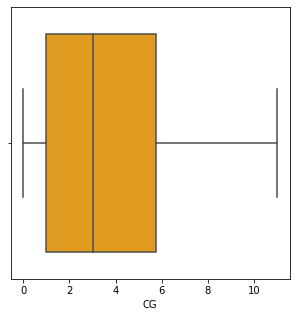

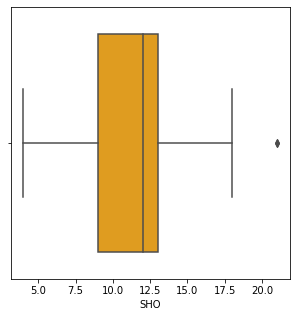

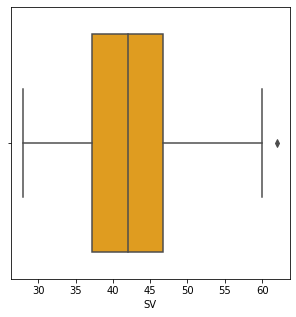

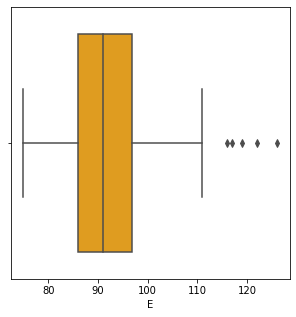

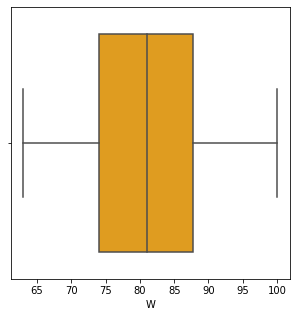

In [41]:
for i in df.columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient='v', color='orange')

#### From above code we find that R, ERA, SHO, SV, E having outliers in the dataset.\

R having outlier in the range of 900.

ERA having outlier in value 5 approximately.

SHO having outliers beyond 20.

SV having outliers in range of 60.

Error starts showing outliers when it goes above 110.

#### 

# Checking Skewness

In [42]:
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

<Figure size 72x36 with 0 Axes>

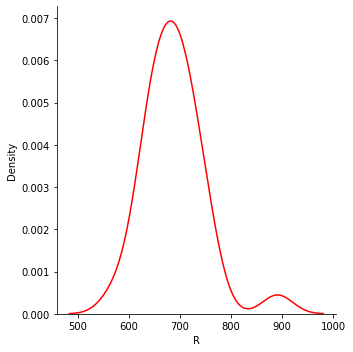

<Figure size 72x36 with 0 Axes>

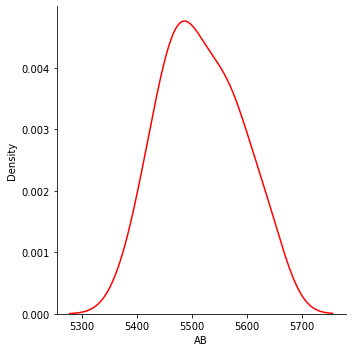

<Figure size 72x36 with 0 Axes>

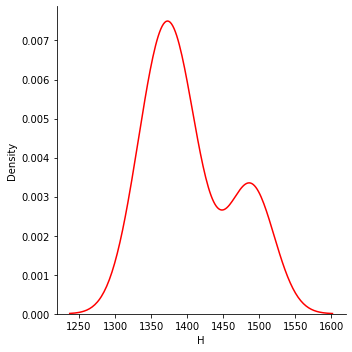

<Figure size 72x36 with 0 Axes>

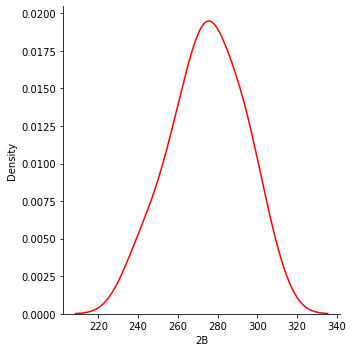

<Figure size 72x36 with 0 Axes>

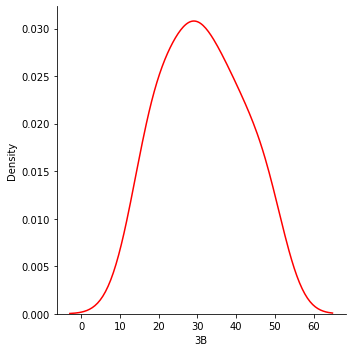

<Figure size 72x36 with 0 Axes>

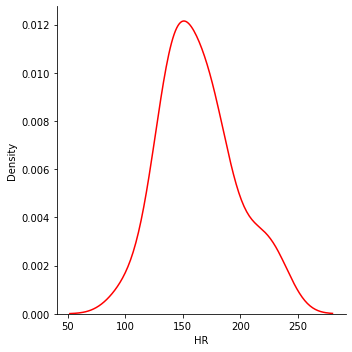

<Figure size 72x36 with 0 Axes>

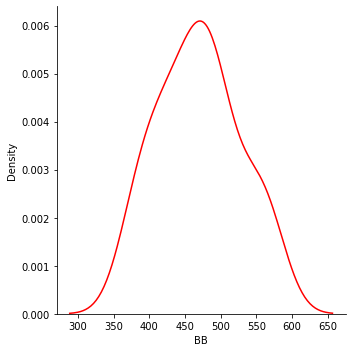

<Figure size 72x36 with 0 Axes>

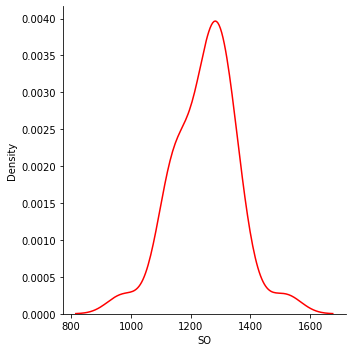

<Figure size 72x36 with 0 Axes>

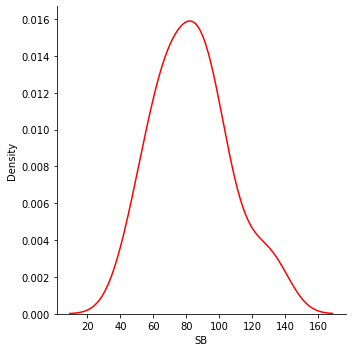

<Figure size 72x36 with 0 Axes>

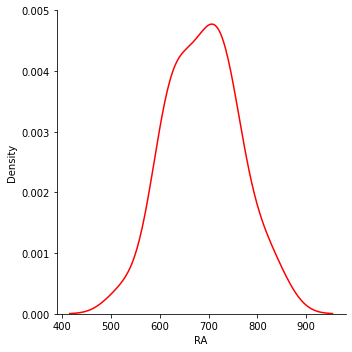

<Figure size 72x36 with 0 Axes>

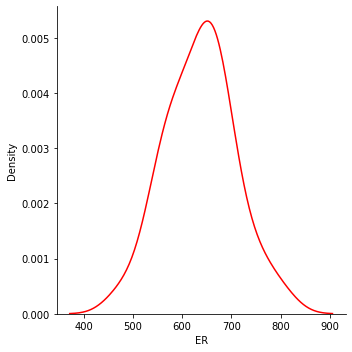

<Figure size 72x36 with 0 Axes>

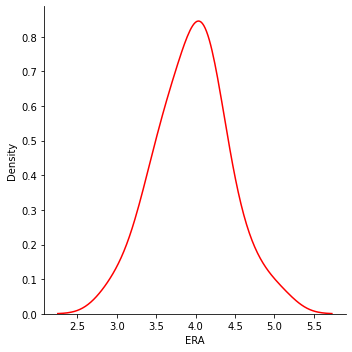

<Figure size 72x36 with 0 Axes>

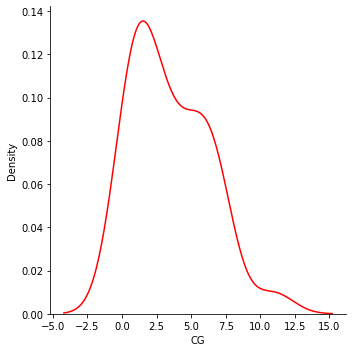

<Figure size 72x36 with 0 Axes>

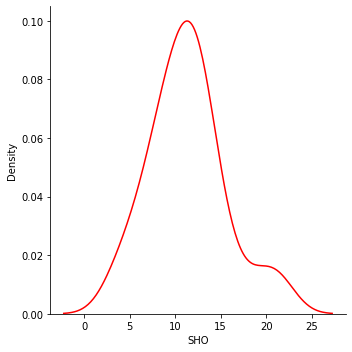

<Figure size 72x36 with 0 Axes>

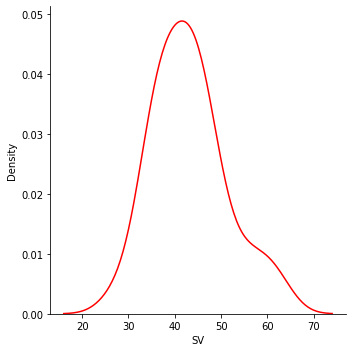

<Figure size 72x36 with 0 Axes>

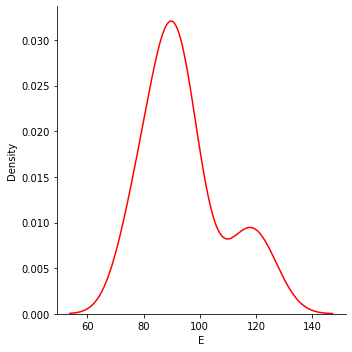

<Figure size 72x36 with 0 Axes>

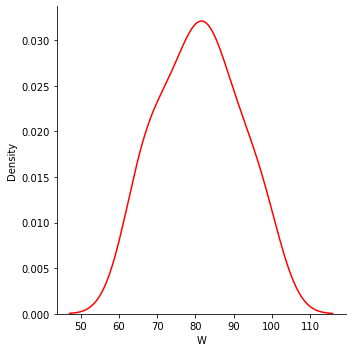

In [43]:
for i in df.columns:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'red',)

#### Observations:
    
R, H, HR, SB, CG, SHO, E, SW shows right skewed dataset.

RA, 3B, SO shows left skewed dataset.


#### 

# Checking Distribution of the dataset

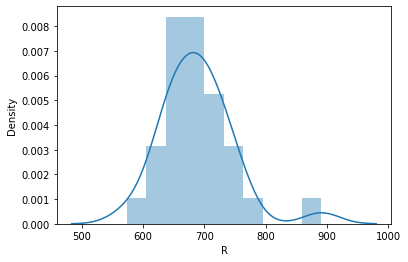

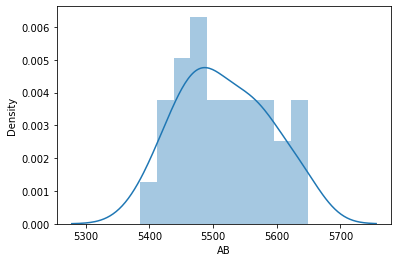

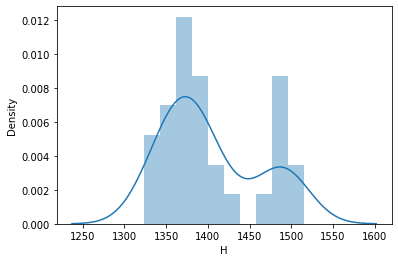

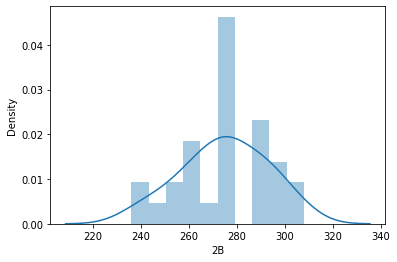

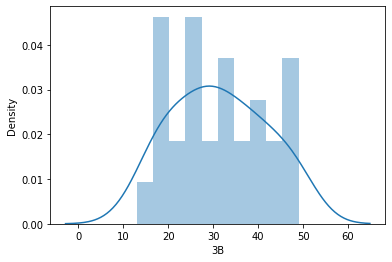

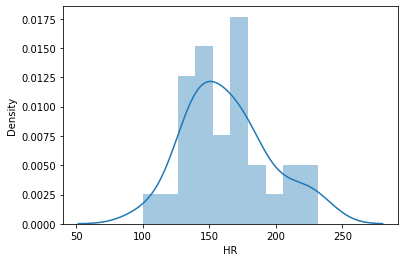

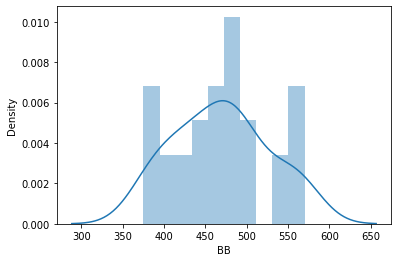

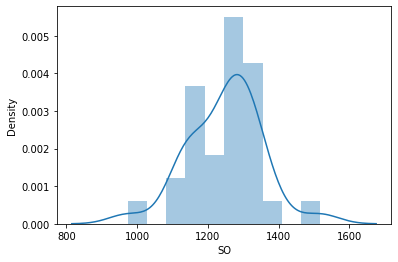

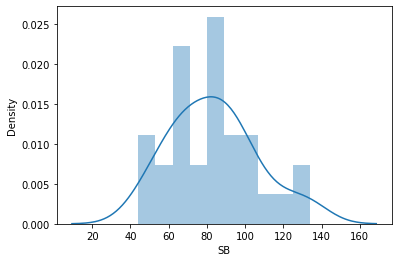

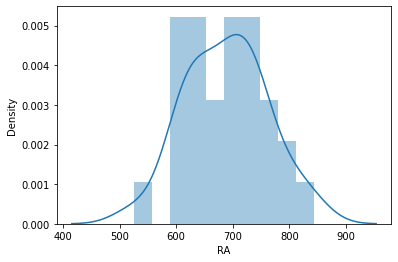

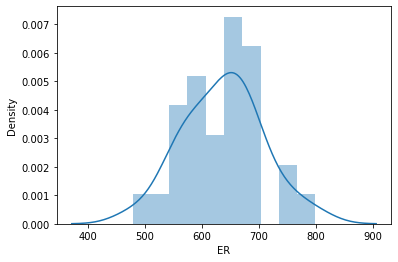

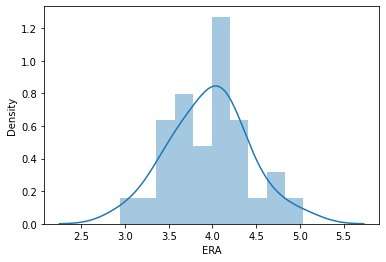

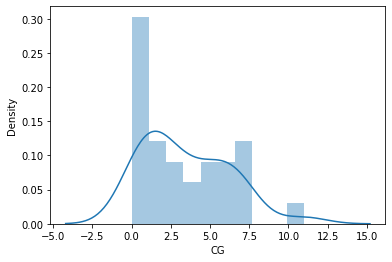

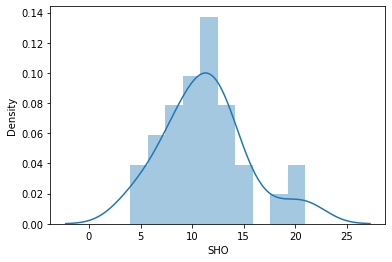

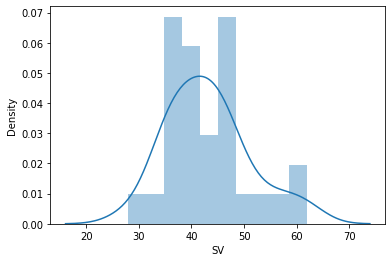

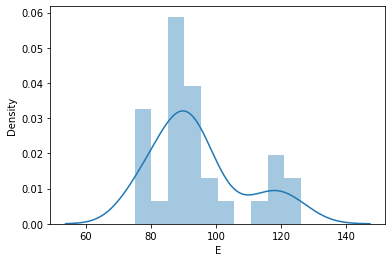

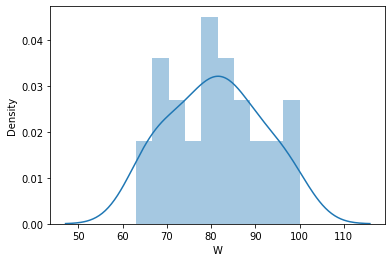

In [44]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], bins = 10)

#### Observations:

R, H, HR, SB, CG, SHO, E, SW shows some right distribution towards the dataset.

RA, 3B, SO shows some left distribution dataset.

#### 

# Checking Overall Glimpse of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

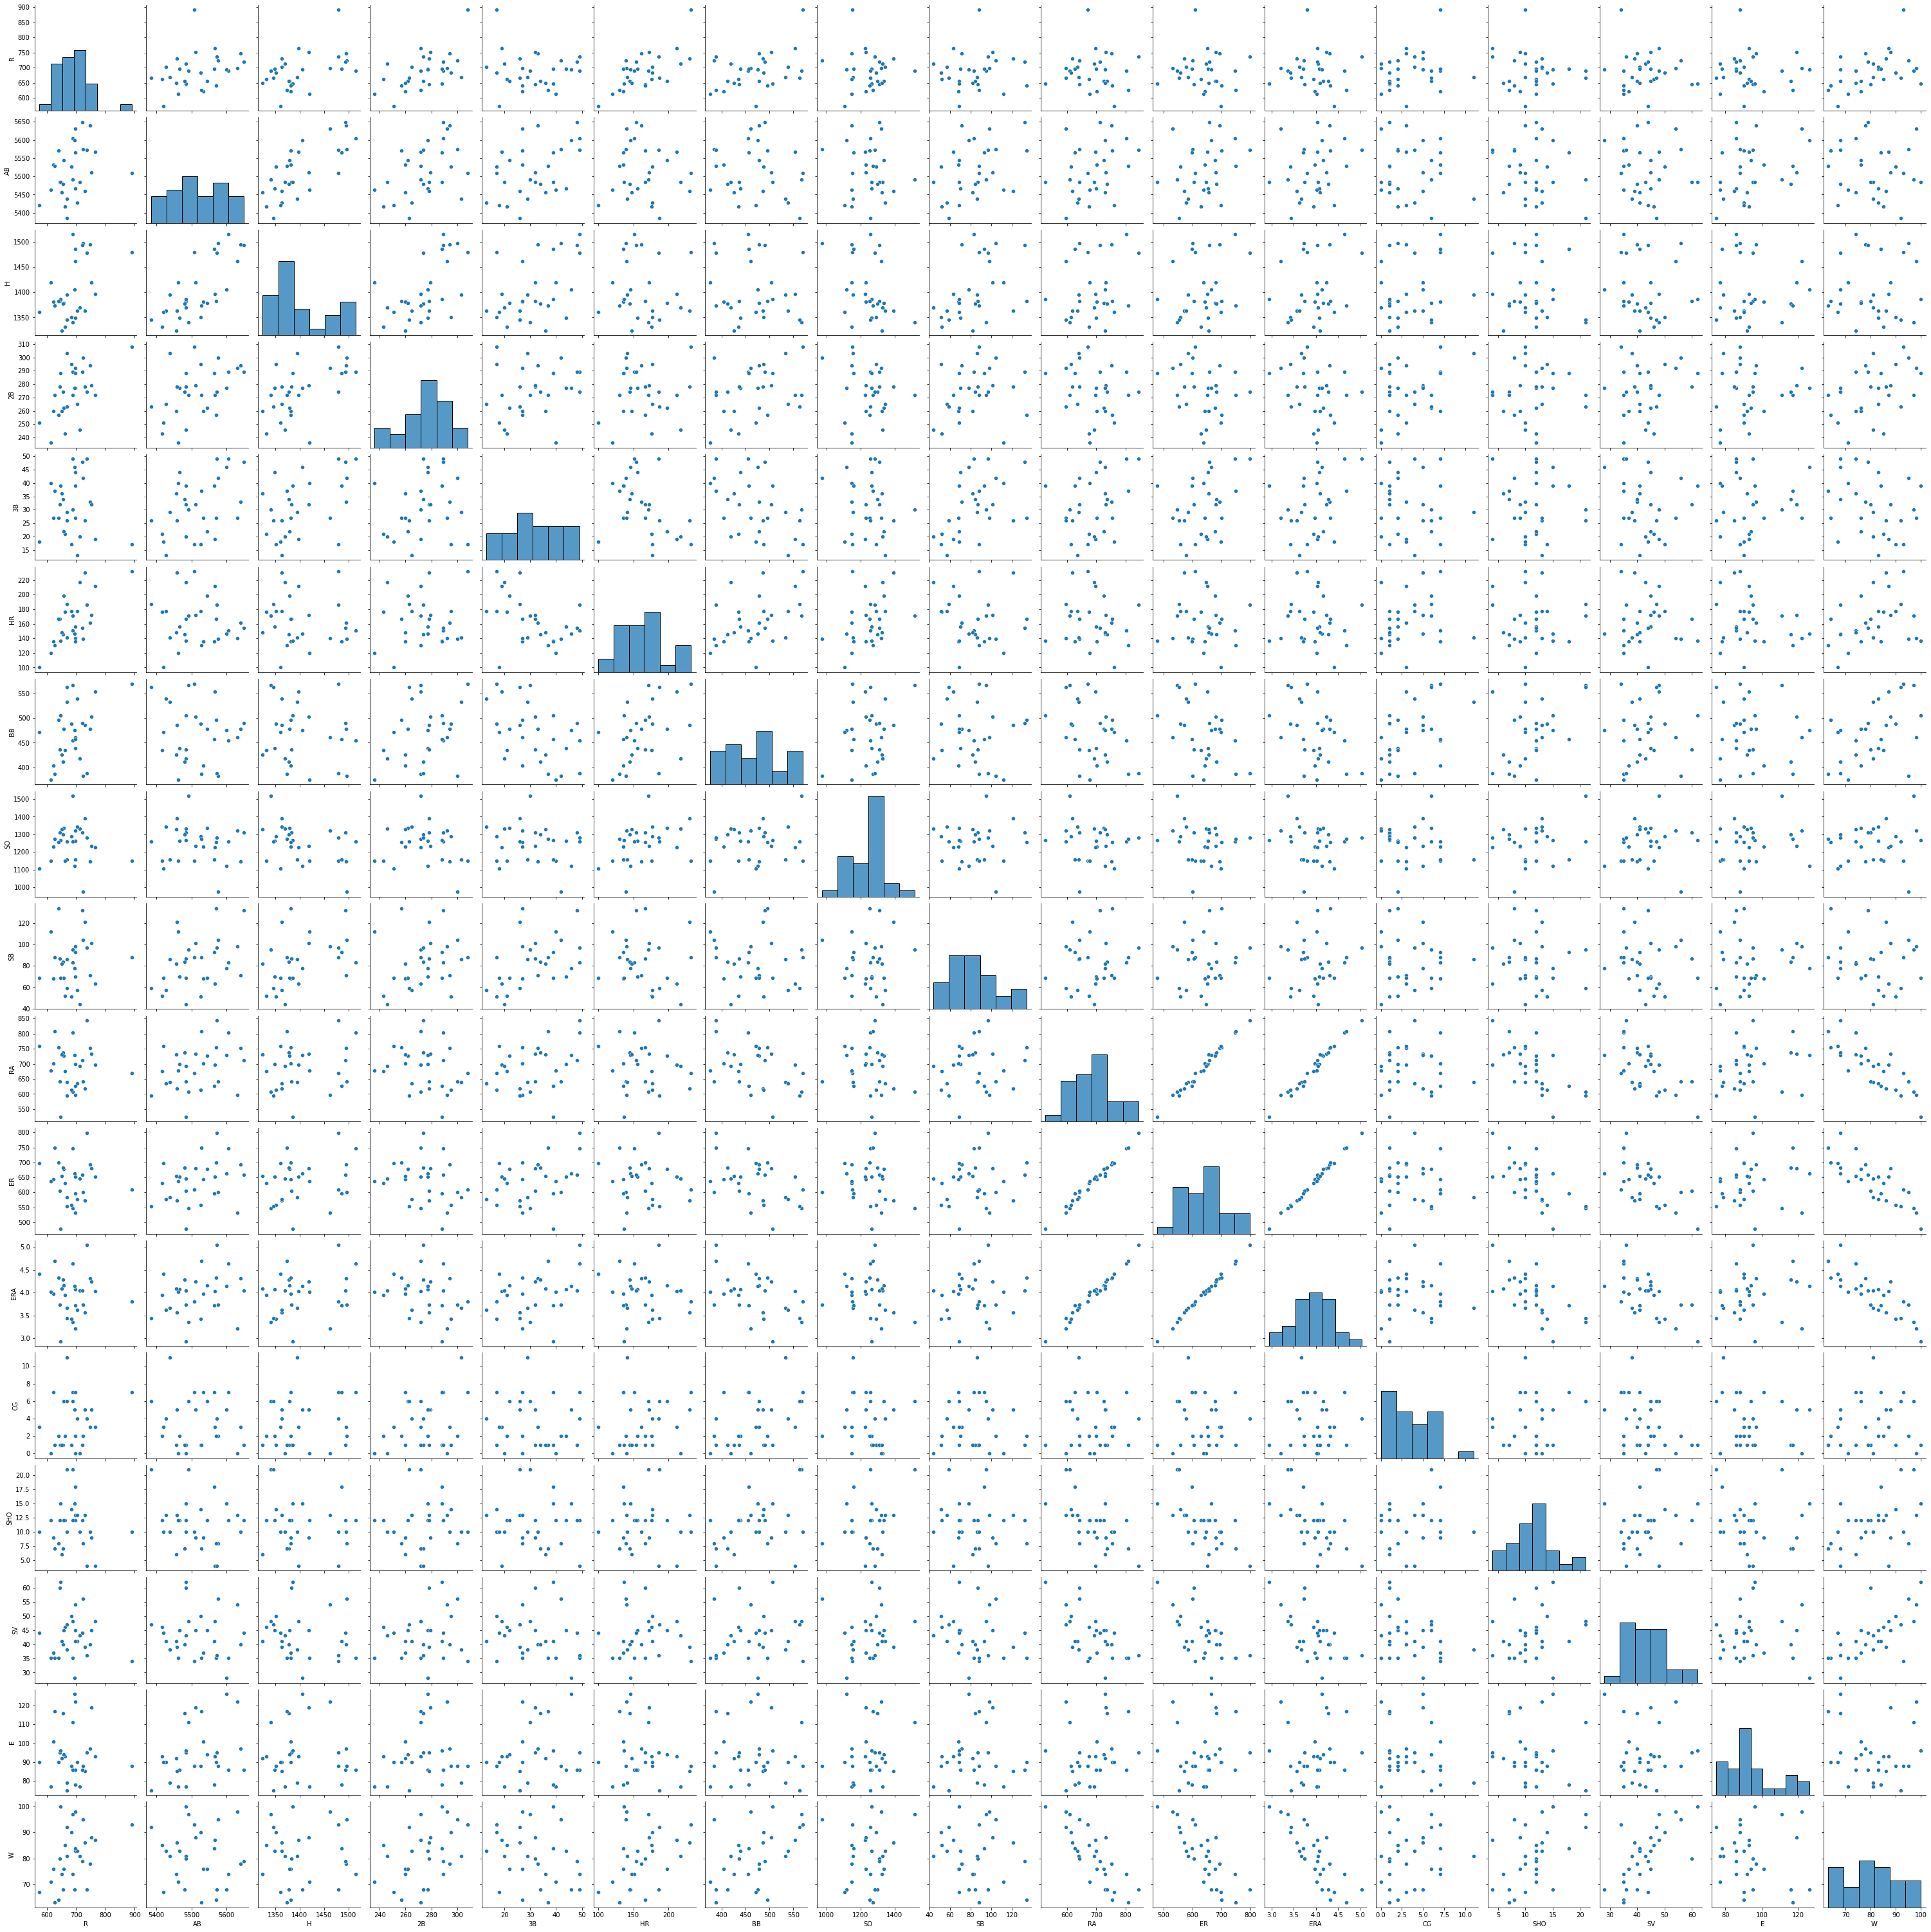

In [45]:
plt.figure(figsize = (15,15))
sns.pairplot(df)

### Here we observe all the dataset performance with respect to each other in a single view

#### 

# Preprocessing of Dataset

In [46]:
df.describe()

R           AB            H          2B         3B  \
count   30.000000    30.000000    30.000000   30.000000  30.000000   
mean   688.233333  5516.266667  1403.533333  274.733333  31.300000   
std     58.761754    70.467372    57.140923   18.095405  10.452355   
min    573.000000  5385.000000  1324.000000  236.000000  13.000000   
25%    651.250000  5464.000000  1363.000000  262.250000  23.000000   
50%    689.000000  5510.000000  1382.500000  275.500000  31.000000   
75%    718.250000  5570.000000  1451.500000  288.750000  39.000000   
max    891.000000  5649.000000  1515.000000  308.000000  49.000000   

               HR          BB          SO          SB          RA          ER  \
count   30.000000   30.000000    30.00000   30.000000   30.000000   30.000000   
mean   163.633333  469.100000  1248.20000   83.500000  688.233333  635.833333   
std     31.823309   57.053725   103.75947   22.815225   72.108005   70.140786   
min    100.000000  375.000000   973.00000   44.000000  525.000000  478.000000   
25%    140.250000  428.250000  1157.50000   69.000000  636.250000  587.250000   
50%    158.500000  473.000000  1261.50000   83.500000  695.500000  644.500000   
75%    177.000000  501.250000  1311.50000   96.500000  732.500000  679.250000   
max    232.000000  570.000000  1518.00000  134.000000  844.000000  799.000000   

             ERA         CG        SHO         SV           E           W  
count  30.000000  30.000000  30.000000  30.000000   30.000000   30.000000  
mean    3.956333   3.466667  11.300000  43.066667   94.333333   80.966667  
std     0.454089   2.763473   4.120177   7.869335   13.958889   10.453455  
min     2.940000   0.000000   4.000000  28.000000   75.000000   63.000000  
25%     3.682500   1.000000   9.000000  37.250000   86.000000   74.000000  
50%     4.025000   3.000000  12.000000  42.000000   91.000000   81.000000  
75%     4.220000   5.750000  13.000000  46.750000   96.750000   87.750000  
max     5.040000  11.000000  21.000000  62.000000  126.000000  100.000000

<AxesSubplot:>

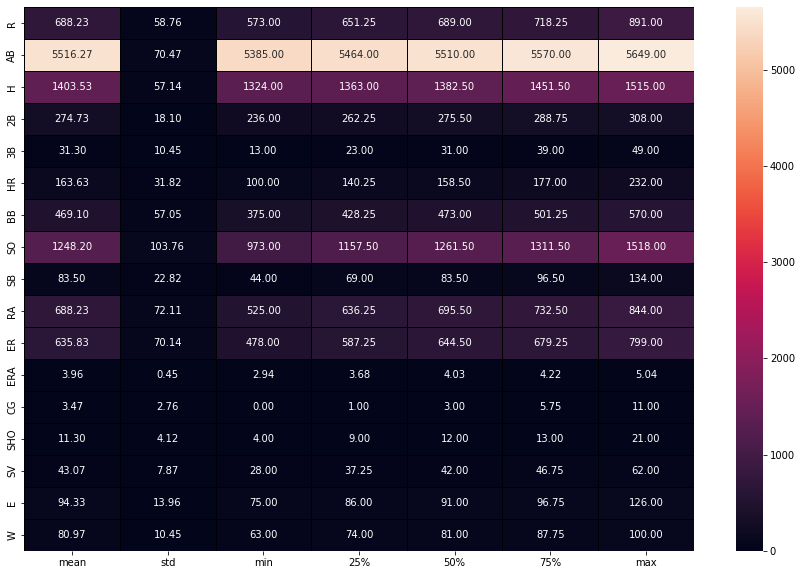

In [47]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### From above information we find that max values of Error, SV, R, ERA, SHO are much higher than its mean values. Due to these Error, SV, R, ERA, SHO probably having outliers in the dataset.


### 

# Checking Correlation of the Dataset

In [48]:
df.corr()

R        AB         H        2B        3B        HR        BB  \
R    1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283  0.402452   
AB   0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983 -0.136414   
H    0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855 -0.118281   
2B   0.560084  0.453370  0.566847  1.000000  0.220490  0.056292  0.302700   
3B  -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915 -0.454949   
HR   0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000  0.425691   
BB   0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691  1.000000   
SO  -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923  0.233652   
SB   0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567 -0.098347   
RA  -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903 -0.416445   
ER  -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922 -0.452663   
ERA -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917 -0.459832   
CG   0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502  0.462478   
SHO -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119  0.426004   
SV  -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540  0.099445   
E   -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597 -0.075685   
W    0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407  0.484342   

           SO        SB        RA        ER       ERA        CG       SHO  \
R   -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042 -0.103274   
AB  -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876 -0.197321   
H   -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955 -0.145559   
2B  -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675  0.057998   
3B  -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898 -0.041396   
HR   0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502 -0.019119   
BB   0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478  0.426004   
SO   1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418  0.237721   
SB   0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783 -0.106563   
RA  -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659 -0.636862   
ER  -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221 -0.630192   
ERA -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856 -0.630833   
CG  -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000  0.241676   
SHO  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676  1.000000   
SV   0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766  0.221639   
E    0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047 -0.115716   
W    0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533  0.471805   

           SV         E         W  
R   -0.096380 -0.023262  0.430751  
AB  -0.106367  0.316743 -0.087947  
H   -0.130371 -0.033173  0.037612  
2B   0.171576  0.105754  0.427797  
3B  -0.142370  0.126678 -0.251118  
HR  -0.028540 -0.207597  0.307407  
BB   0.099445 -0.075685  0.484342  
SO   0.126297  0.155133  0.111850  
SB  -0.183418  0.079149 -0.157234  
RA  -0.616224  0.198996 -0.812952  
ER  -0.589663  0.136921 -0.809435  
ERA -0.607005  0.113137 -0.819600  
CG  -0.367766 -0.140047  0.080533  
SHO  0.221639 -0.115716  0.471805  
SV   1.000000 -0.025636  0.666530  
E   -0.025636  1.000000 -0.089485  
W    0.666530 -0.089485  1.000000

<AxesSubplot:>

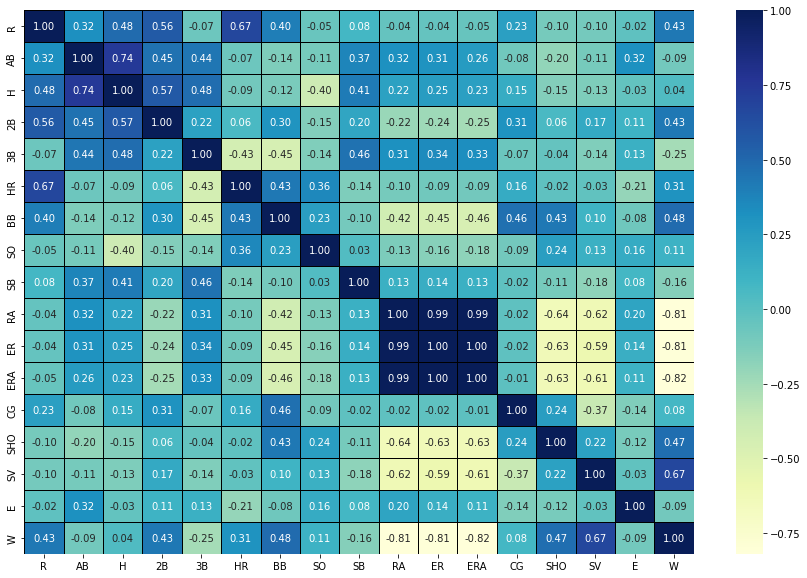

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

RA, ERA, RA show highest correlation toward the dataset.

CG with respect to ERA shows least correlation in the dataset.

Some of the dataset columns shows negative correlation towards dataset i.e SHO, RA, ERA, W with respect to RA, ER, ERA and many more

#### 

### Checking Positive and Negative Correlation with the dataset

<AxesSubplot:>

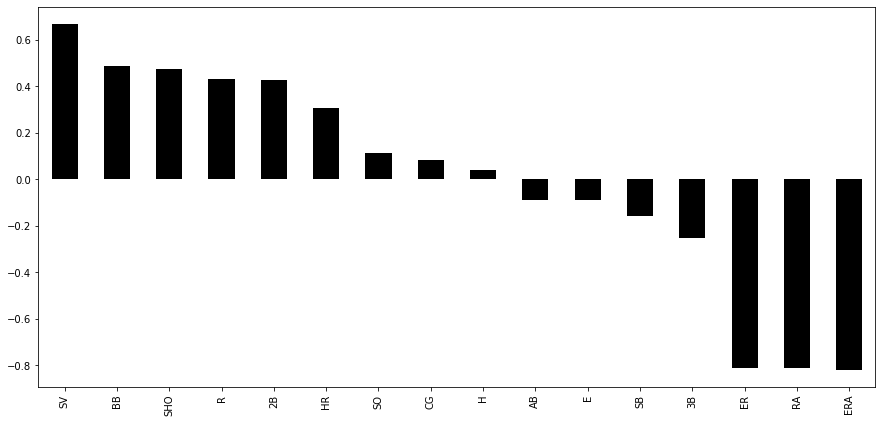

In [50]:
plt.figure(figsize = (15,7))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind = 'bar', color = 'k')

### AB, E, SB, 3B, ER, RA, ERA shows negative relation towards "W" rest dataset shows positive correlation with respect to Wins

#### 

# Removing Outliers from the Dataset

In [51]:
from scipy.stats import zscore

z = np.abs(zscore(df))

# taking thresold value = 3
#np.where(z>3)

df_new = df[(z<3).all(axis = 1)]

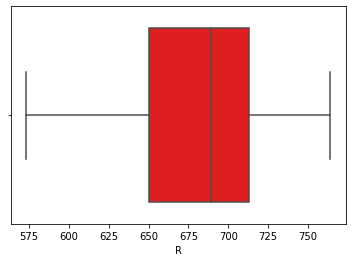

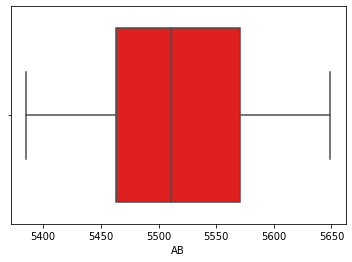

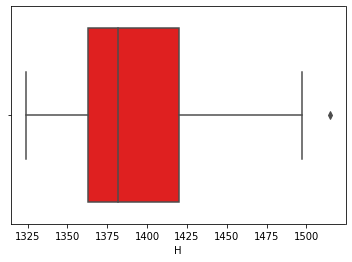

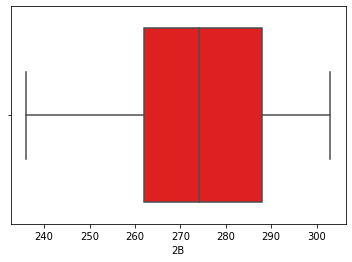

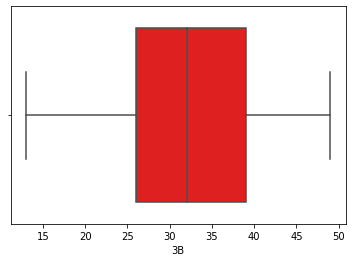

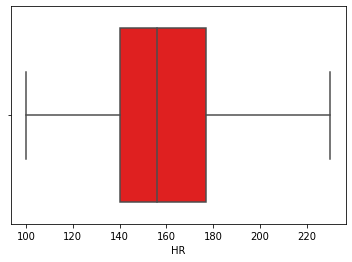

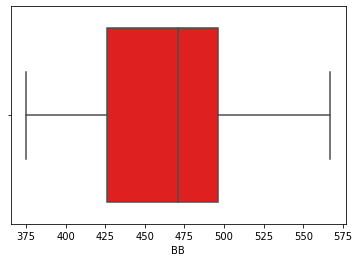

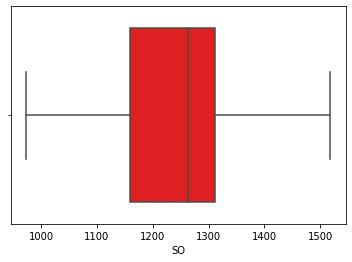

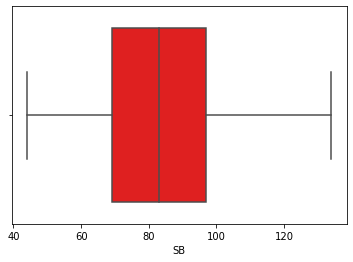

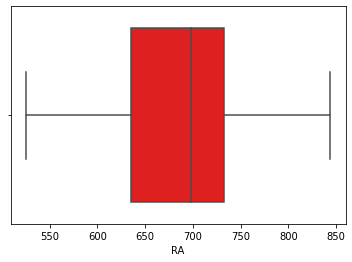

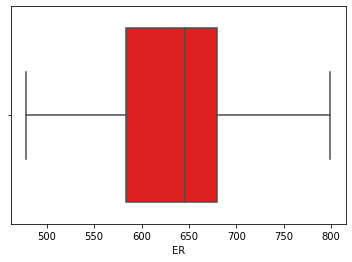

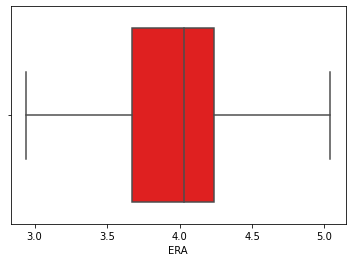

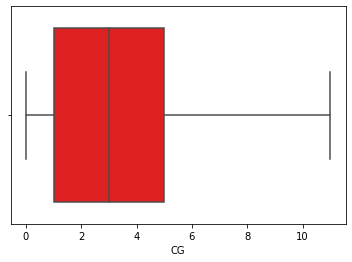

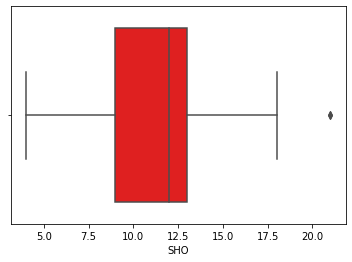

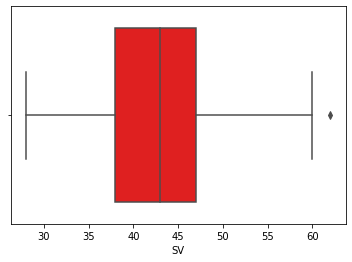

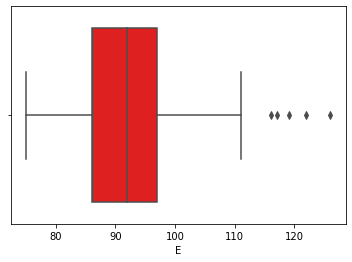

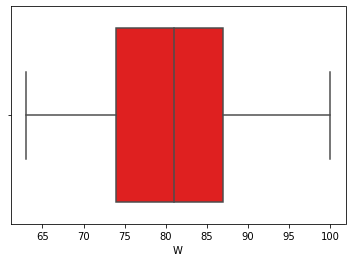

In [52]:
for i in df_new.columns:
    plt.figure()
    sns.boxplot(df_new[i], color = 'r')

### From above Zscore method outliers from R, ERA, SHO, SV columns dataset has been removed.



#### 

# Percentage of Data Loss

In [53]:
#print(df_new.shape)  #(29, 17)
#print(df.shape)  #(30, 17)

percentage = round((30-29)/30*100,2)
print(percentage, "Percentage of data loss")   # Not much dataloss hence we can remove more outliers

3.33 Percentage of data loss


# Removing Outliers with Interquartile Method

In [54]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1

In [55]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [56]:
df_IQR.shape

(20, 17)

### Percentage of Data Loss with Interquartile Method

In [57]:
percentage = round((30-20)/30*100,2)
print(percentage, "Percentage of data loss")   # Higher dataloss hence we can't consider it.

33.33 Percentage of data loss


## From above two observations we find that Zscore method show lesser data loss hence we are considering it for outliers removal.

#### 

# Dividing Data for Feature Selection

In [58]:
x = df_new.drop('W', axis = 1)
y = df_new['W']
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (29, 16)
Shape of y (29,)


# Removing Skewness

In [59]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [60]:
x.skew()  # checking skewness

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

#### Skewness of H, CG, SV and E are not in acceptable range hence we need to fix them

In [61]:
skew_x = pw.fit_transform(x)

In [62]:
x = pd.DataFrame(skew_x, columns = x.columns)

In [67]:
x.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

From above code we find that skewness are under acceptable range.

But here we find that due to less no. of dataset AB and H skewness becomes zero(NaN).

#### 

From above code skewness are under the +/- 0.5 thresold values

And skewness present in AB and H have been totally removed due to less no. of data present in the dataset.

### 

# Checking Mutlicollinearity of the columns dataset

In [68]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def calc_vif(x1):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif['VIF factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [70]:
#checking variance inflation factor for each columns

x = pd.DataFrame(x, columns = x.columns)
calc_vif(x)

Variance  VIF factor
0         R    3.806498
1        AB         NaN
2         H         NaN
3        2B    2.783464
4        3B    2.950443
5        HR    5.968093
6        BB    3.197536
7        SO    2.965124
8        SB    2.058844
9        RA  188.313378
10       ER  599.940988
11      ERA  337.133612
12       CG    2.177406
13      SHO    3.311950
14       SV    3.381055
15        E    1.767694

### Above information shows that RA, ER and ERA are highly correlated towards the target dataset.

#### Checking correlation again for understanding about above columns

<AxesSubplot:>

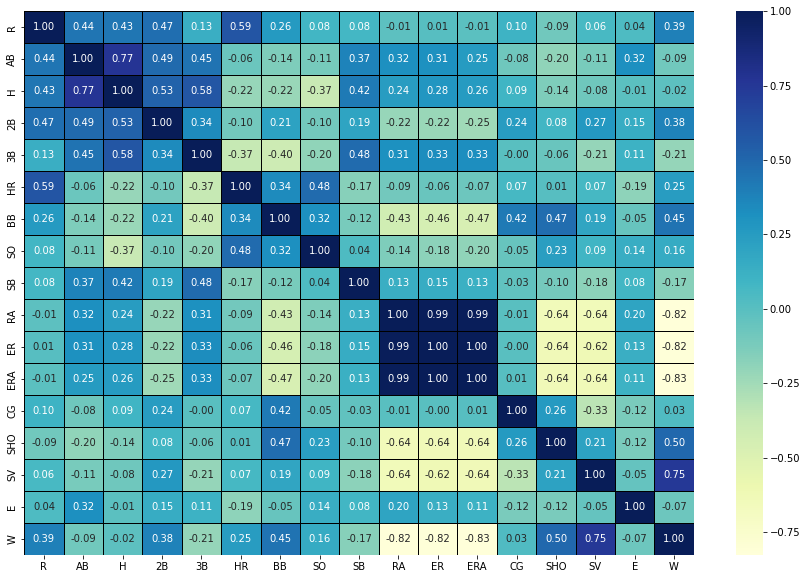

In [71]:
plt.figure(figsize = (15,10))
sns.heatmap(df_new.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

RA and ER shows -0.82 correlation toward target variable.

While ERA show -.83 correlation toward target variable.

Hence as per above information due to less number of dataset we need to delete rows one by one after checking effect of correlation deleting a column.

In [72]:
x.drop(['ERA'], inplace = True, axis = 1)  # dropping ERA column from the dataset

In [73]:
calc_vif(x)   # checking again multicollinearity

Variance  VIF factor
0         R    3.705587
1        AB         NaN
2         H         NaN
3        2B    2.601263
4        3B    2.950104
5        HR    5.314259
6        BB    3.177748
7        SO    2.882390
8        SB    1.850327
9        RA  177.535030
10       ER  168.799187
11       CG    2.087873
12      SHO    2.996656
13       SV    2.987326
14        E    1.665533

#### As per previous observations of multicollinearity of RA 188.313378 and ER 599.940988, now decreases to 177.535030 and 168.799187 respectively.

#### But still multicollinearity are much higher with respect to other columns hence we need to drop more columns.

#### As per above correlation we find that RA and ER shows -0.82 towards target variable and present VIF we see that RA shows high VIF hence we need to drop it first.

In [74]:
x.drop('RA', inplace = True, axis = 1)  # dropping RA column

### Checking again Variance Inflation Factor

In [75]:
calc_vif(x)

Variance  VIF factor
0         R    3.705383
1        AB         NaN
2         H         NaN
3        2B    2.476235
4        3B    2.896286
5        HR    4.353748
6        BB    2.705594
7        SO    2.219290
8        SB    1.627490
9        ER    3.648757
10       CG    1.948604
11      SHO    2.699173
12       SV    2.087026
13        E    1.332179

#### As per above VIF we find that all VIF factor are in the acceptable range.

In [76]:
x.head(2)  # checking columns

R   AB    H        2B        3B        HR        BB        SO  \
0  0.962544  0.0  0.0  1.685188  1.006150 -0.741927 -1.605198 -2.550612   
1  0.298863  0.0  0.0  0.138198  1.185227 -0.109958 -0.462096  0.093683   

         SB        ER        CG       SHO        SV         E  
0  0.936132 -0.508052 -0.307098 -0.787002  1.532753 -0.348265  
1 -0.516377  0.235800 -0.307098  0.236737  0.312020 -0.540820

#### 

#### 

# Scalling of the dataset

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [78]:
x = pd.DataFrame(x_scaler, columns = x.columns)

In [79]:
x.head(5)

R   AB    H        2B        3B        HR        BB        SO  \
0  0.962544  0.0  0.0  1.685188  1.006150 -0.741927 -1.605198 -2.550612   
1  0.298863  0.0  0.0  0.138198  1.185227 -0.109958 -0.462096  0.093683   
2 -0.312105  0.0  0.0  1.907385 -0.228819 -0.664354  1.232098 -0.935611   
3 -1.308298  0.0  0.0 -0.837665 -0.432228 -0.860039 -1.162721 -0.230683   
4  0.137737  0.0  0.0  0.911435  1.622636 -0.289647 -0.155686  0.044143   

         SB        ER        CG       SHO        SV         E  
0  0.936132 -0.508052 -0.307098 -0.787002  1.532753 -0.348265  
1 -0.516377  0.235800 -0.307098  0.236737  0.312020 -0.540820  
2  0.225038 -0.752214  2.011315 -0.252844 -0.664137 -1.326125  
3 -0.618422  0.093091  1.264463 -0.513555 -0.820689  0.650818  
4  0.095038  1.555853  1.264463  0.236737 -1.149165 -0.540820

# Feature Selection

### Since output variables having continuos variables hence we use regression model

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [81]:
class best_model:
    def best_fit(x, y, model):      # for finding best random state values
        random_state_values = []
        for i in range(0,1000):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(r2_score(y_train, pred_train)*100,1) == round(r2_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training r2_score is:-", r2_score(pred_train, y_train)*100)
                print("Testing r2_score is:-", r2_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):   # for making final decision model after selecting a best random state value.
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = r2_score(pred_train, y_train)
        Test_accuracy = r2_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
        print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
        print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        
        
    def cross_val_score(model, x, y):    # cross val score of the model
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,)

# Model 1: Linear Regression

In [82]:
model = LinearRegression()

In [83]:
best_model.best_fit(x, y, model)

Best fit random_state_values []


### Here we find that there is no random state value in which r2_score seems equals to training and testing values.

# Regularization Methods

# Model 2: Lasso Regression

In [84]:
model = Lasso()

#Lasso all parameters

# (alpha=1.0, fit_intercept=True, normalize='deprecated', precompute=False, 
# copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False,random_state=None, selection='cyclic')

### Ensemble Technique

## Hyper Parameter Tuning

In [85]:
# using hyper parameter tuning for Lasso regression to find out best criterion

# param = {"alpha": [0.1, 0.01, 0.001, 1, 0.5], "fit_intercept": ['True', 'False'], "normalize": ['deprecated', 'True', 'False'],
#         'copy_X': ['True', 'False'], 'max_iter': [500, 1000, 1500, 2000], 'tol': [.0001, .0002, .0003, .0004], 'warm_start': ['True', 'False'],
#         'positive': ['True', 'False',], 'selection': ['cyclic', 'random']}

# checking above params takes too much time hence boolean type params not captured.

param = {"alpha": [0.1, 0.01, 0.001, 1, 0.5], 'max_iter': [500, 1000, 1500, 2000], 'tol': [.0001, .0002, .0003, .0004],
         'selection': ['cyclic', 'random']}


gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_

#{'alpha': 0.5, 'max_iter': 2000, 'selection': 'random', 'tol': 0.0004}

{'alpha': 0.5, 'max_iter': 2000, 'selection': 'random', 'tol': 0.0004}

In [86]:
model = Lasso(alpha = 0.5, max_iter = 2000, selection = 'random', tol = 0.0004)

In [87]:
best_model.best_fit(x, y, model)

At random_state:- 129
Training r2_score is:- 89.74640658680487
Testing r2_score is:- 90.40558071883295


Best fit random_state_values [129]


In [88]:
best_model.final_model(x, y, model, 129)

At random state 129 model giving best accuracy score 

Training accuracy:-  89.7524175186031
Testing accuracy:-  90.41217709002848


--------------------------------------
Mean squared error:-  6.103002956223914
Mean absolute error:-  1.7974432384800343
Root Mean squared error:- 2.470425662962542


In [89]:
best_model.cross_val_score(model, x, y)

cross_val_score 74.85336285943005 at cv = 2
cross_val_score 71.89448118639164 at cv = 3
cross_val_score 78.22439647973766 at cv = 4
cross_val_score 56.74131135258899 at cv = 5
cross_val_score 63.7749297850455 at cv = 6
cross_val_score 48.01023504745786 at cv = 7


# Model 3: Ridge Regression

In [90]:
model = Ridge()

#Ridge all parameters

# (alpha=1.0, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False,
# random_state=None,)

## Hyper Paramter Tuning

In [91]:
# using hyper parameter tuning for Ridge regression to find out best criterion

# param (alpha=1.0, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False,
# random_state=None,)

# checking above params takes too much time hence boolean type params not captured.

param = {"alpha": [0.1, 0.01, 0.001, 1, 0.5], 'max_iter': [500, 1000, 1500, 2000], 'tol': [.0001, .0002, .0003, .0004],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}


gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_

# {'alpha': 1, 'max_iter': 1500, 'solver': 'sag', 'tol': 0.0004}

{'alpha': 1, 'max_iter': 1500, 'solver': 'sag', 'tol': 0.0004}

In [92]:
model = Ridge(alpha= 1, max_iter = 1500, solver = 'sag', tol = 0.0004)

In [93]:
best_model.best_fit(x, y, model)  #finding best random state values

At random_state:- 476
Training r2_score is:- 88.82953823068077
Testing r2_score is:- 89.6478408838849


At random_state:- 734
Training r2_score is:- 91.036817625466
Testing r2_score is:- 93.96650473415734


Best fit random_state_values [476, 734]


In [94]:
best_model.final_model(x, y,model, 476)  # 476 random states great accuracy with 0.9 difference in testing and training score 

At random state 476 model giving best accuracy score 

Training accuracy:-  88.82896177194675
Testing accuracy:-  89.61493159802181


--------------------------------------
Mean squared error:-  15.538629247259069
Mean absolute error:-  3.3905439850878327
Root Mean squared error:- 3.941906803472029


In [95]:
best_model.cross_val_score(model, x, y)

cross_val_score 69.84446268145183 at cv = 2
cross_val_score 49.42744705113852 at cv = 3
cross_val_score 61.93437443626445 at cv = 4
cross_val_score 45.99090763484818 at cv = 5
cross_val_score 40.33015782773781 at cv = 6
cross_val_score 33.617446212309105 at cv = 7


# Model 4: ElasticNet Regression

In [96]:
model = ElasticNet()

#ElasticNet all parameters

# alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001,
#warm_start=False, positive=False, random_state=None, selection='cyclic'

### Ensemble Technique

## Hyper Parameter Tuning

In [97]:
# using hyper parameter tuning for ElasticNet regression to find out best criterion

# alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, max_iter=1000, copy_X=True, tol=0.0001,
#warm_start=False, positive=False, random_state=None, selection='cyclic'

# checking above params takes too much time hence boolean type params not captured.

param = {"alpha": [0.1, 0.01, 0.001, 1, 0.5], 'l1_ratio': [.5,.1,.2,1,.05],'max_iter': [500, 1000, 1500, 2000], 'tol': [.0001, .0002, .0003, .0004],
        'selection': ['cyclic', 'random']}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_


{'alpha': 0.5,
 'l1_ratio': 1,
 'max_iter': 2000,
 'selection': 'random',
 'tol': 0.0002}

In [98]:
model = ElasticNet(alpha = 0.5, l1_ratio = 1, max_iter = 2000, selection = 'random', tol = 0.0002 )
best_model.best_fit(x, y, model)

At random_state:- 129
Training r2_score is:- 89.7470739867571
Testing r2_score is:- 90.4615013115156


Best fit random_state_values [129]


In [99]:
best_model.final_model(x,y, model, 129)

At random state 129 model giving best accuracy score 

Training accuracy:-  89.74762504931631
Testing accuracy:-  90.42704482298561


--------------------------------------
Mean squared error:-  6.094274258035497
Mean absolute error:-  1.79576906375989
Root Mean squared error:- 2.4686583923328675


In [100]:
best_model.cross_val_score(model, x, y)

cross_val_score 74.86927228113986 at cv = 2
cross_val_score 71.90812170973899 at cv = 3
cross_val_score 78.18668736047161 at cv = 4
cross_val_score 56.70538063446933 at cv = 5
cross_val_score 63.768385728508235 at cv = 6
cross_val_score 48.02216610871857 at cv = 7


# Model 5: Random Forest Regressor

In [101]:
model = RandomForestRegressor()

In [102]:
best_model.best_fit(x, y, model)  #finding best random state values

Best fit random_state_values []


### For case in Random Forest we find that there is no random state value in which r2_score seems equals to training and testing values

# Model 6: KNeighbors Regressor

In [103]:
model = KNeighborsRegressor(n_neighbors=5)

In [104]:
best_model.best_fit(x, y, model)  #finding best random state values

Best fit random_state_values []


### For case in KNeighbor Regressor we find that there is no random state value in which r2_score seems equals to training and testing values

# Model 7: Support Vector Regressor

In [105]:
model = SVR()

# SVR all parameters

# kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     tol=0.001,
#     C=1.0,
#     epsilon=0.1,
#     shrinking=True,
#     cache_size=200,
#     verbose=False,
#     max_iter=-1


### Hyper Parameter Tuning

In [106]:
# using hyper parameter tuning for SVR regression to find out best criterion

param = {"kernel": ['rbf', 'poly', 'linear'], 'degree': [1,2,3,4,5], 'gamma': ['scale', 'auto'], 
         'epsilon': [0.1, 0.2, 0.3]}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_

{'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [107]:
model = SVR(degree = 1, epsilon = 0.1, gamma = 'scale', kernel = 'linear' )

In [108]:
best_model.best_fit(x, y, model)  #finding best random state values

At random_state:- 453
Training r2_score is:- 81.90139916020642
Testing r2_score is:- 86.16360014330215


Best fit random_state_values [453]


### For case in Support Vector Regressor we find that there are much difference in value of r2_score of equals to training and testing values hence we are not considering it.

#### 

## Glimpse of the Best Machine Learning Models

In [110]:
# models                 R2_score score     CV score        CV state    Mean Squared Error

# Lasso                 90.42434673079437  78.23805763484467    4       6.094709762373579
# Ridge                 91.30394164566142  70.16446555896435    2       11.258869972834754
# ElasticNet            90.38913230431608  78.1914977471496     4       6.072201128393944

### From above observation we conclude that ElasticNet performs well with lesser rate of error 6.072201128393944, with 90.38913230431608 accuracy score.

# Final Model ElasticNet

In [111]:
final_model = model = ElasticNet(alpha = 0.5, l1_ratio = 1, max_iter = 2000, selection = 'random', tol = 0.0003 )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 129)
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
print("At random state", i , "model giving best accuracy score","\n")
Test_accuracy = r2_score(pred_test, y_test)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Mean squared error:- ', mean_squared_error(pred_test, y_test) )
print('Mean absolute error:- ', mean_absolute_error(pred_test, y_test) )
print('Root Mean squared error:-',np.sqrt(mean_squared_error(pred_test, y_test)))
        

At random state W model giving best accuracy score 

Testing accuracy:-  90.40984610392111


--------------------------------------
Mean squared error:-  6.103250549911806
Mean absolute error:-  1.7981528340844777
Root Mean squared error:- 2.4704757739981598


In [112]:
cv = cross_val_score(final_model, x, y, cv = 4).mean()
print('cross_val_score', cv*100,'at cv =', 4,)   # best CV score at 4 state hence we are considering it.

cross_val_score 78.20840405692675 at cv = 4


#### Checking Coefficient of the model

In [113]:
coef_final_model = pd.DataFrame(final_model.coef_, x.columns)
coef_final_model

0
R    3.371385
AB   0.000000
H    0.000000
2B  -0.000000
3B   0.000000
HR   0.000000
BB   0.000000
SO  -0.000000
SB  -0.270023
ER  -5.070730
CG   1.075410
SHO  0.708973
SV   3.961136
E   -0.000000

# Checking Performance with Graph

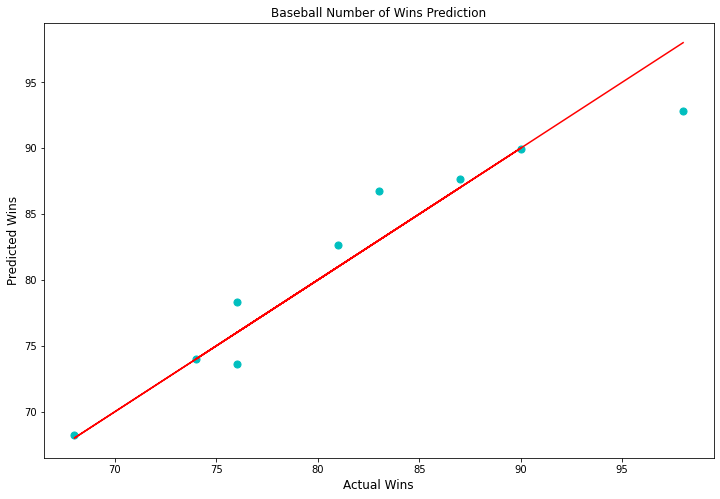

In [114]:
final_pred = final_model.predict(x_test)
plt.figure(figsize = (12, 8))
plt.scatter(x = y_test, y  = final_pred, color = 'c', s = 50)
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual Wins', fontsize = 12)
plt.ylabel('Predicted Wins', fontsize = 12)
plt.title('Baseball Number of Wins Prediction')
plt.show()

### Deploy Model

In [115]:
import pickle

filename = "baseball.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [116]:
load = pickle.load(open('baseball.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9187704083892776


### Conclusion

In [117]:
conclusion = pd.DataFrame()
conclusion['Predicted Wins'] = np.array(final_model.predict(x_test))
conclusion['Actual Wins'] = np.array(y_test)

In [118]:
conclusion

Predicted Wins  Actual Wins
0       92.845767           98
1       73.614938           76
2       68.200401           68
3       87.673595           87
4       78.313126           76
5       86.759988           83
6       89.950710           90
7       73.992497           74
8       82.640177           81